In [1]:
import os
import pathlib
import pandas as pd

import copy
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

import analysis
%load_ext autoreload
%autoreload 2

# Définir le répertoire racine où vous souhaitez chercher des fichiers .csv
root_directory = os.getcwd() +"/outputs"

# Créer une liste vide pour stocker tous les DataFrames des fichiers .csv trouvés
data_frames = []

# Parcourir tous les fichiers du répertoire racine et des sous-répertoires de manière récursive
if_break = False
for subdir, dirs, files in os.walk(root_directory):
    if not "trash" in subdir:
        for file in files:
            # Vérifier si le fichier est un fichier .csv
            if file.endswith('reports.csv'):
                # Ouvrir le fichier .csv dans un DataFrame
                file_path = os.path.join(subdir, file)
                df = pd.read_csv(file_path, sep='\t')
                df["file_path"] = file_path
                # Ajouter le DataFrame à la listeZ
                data_frames.append(df)

        #         for subdir_log, _, file_logs in os.walk(pathlib.Path(subdir).parent):
        #             for file_log in file_logs:
        #                 if file_log.endswith('.log'):
        #                     file_path_log = os.path.join(subdir_log, file_log)
        #                     print(analysis.get_losses_from_log(file_path_log))
        #                     # print(log_file.read())
        #                     print(file_path_log)
        #                     if_break = True
        #                     break
        #             if if_break:
        #                 break
        #     if if_break:
        #         break
        # if if_break:
        #     break

# Fusionner tous les DataFrames en un seul DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)
# merged_df = merged_df.loc[merged_df["ATK_objective"].str.contains("Masked")]

# Afficher le DataFrame résultant
print(merged_df.shape)

(3728, 52)


In [2]:
print(merged_df.columns)
for col in merged_df.columns:
    print(f"{col:<20}, {merged_df[col].loc[50]}")
# print(merged_df["ATK_optim"].loc[0])
# print(merged_df["ATK_objective"].loc[0])
# print(merged_df["model"].loc[0])
# print(merged_df["datapoints"].loc[0])
# print(merged_df["score"].loc[0])
# print(merged_df["model_state"].loc[0])

Index(['name', 'usecase', 'model', 'datapoints', 'model_state', 'attack',
       'attacktype', 'mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'min_mse',
       'max_mse', 'max_psnr', 'max_lpips', 'max_ssim', 'max_rpsnr', 'IIP-none',
       'feat_mse', 'parameters', 'label_acc', 'queries', 'score', 'total_time',
       'user_type', 'gradient_noise', 'seed', 'ATK_type', 'ATK_attack_type',
       'ATK_label_strategy', 'ATK_text_strategy', 'ATK_token_recovery',
       'ATK_objective', 'ATK_restarts', 'ATK_init', 'ATK_normalize_gradients',
       'ATK_optim', 'ATK_augmentations', 'ATK_differentiable_augmentations',
       'ATK_regularization', 'ATK_impl', 'data', 'impl', 'server', 'user',
       'num_queries', 'folder', 'file_path', 'IIP-pixel', 'IIP-lpips',
       'IIP-self'],
      dtype='object')
name                , no_mask
usecase             , image_custom
model               , custom_McMahan_32_32
datapoints          , 20
model_state         , default
attack              , deep-leakage
at

['custom_McMahan_32_32' 'custom_LeNet_fromDLG' 'VGG16' 'custom_ResNet18'
 'LeNet_Zhu' 'McMahan_32_32']
(390, 52)
[4]
(390, 52)
['mask_sparsity_quantile' 'mask_sparsity_reversed_quantile'
 'mask_sparsity_random']
['deep-leakage']
model: ['McMahan_32_32']
number of total experiment: 390
sparsity(13): [0.4  0.05 0.9  0.7  0.2  0.3  0.99 0.5  0.95 0.8  0.1  0.6  0.01]
mask_type(3): ['mask_sparsity_quantile' 'mask_sparsity_random'
 'mask_sparsity_reversed_quantile']
number of experiment for each (sparsity&mask_type): 10.0


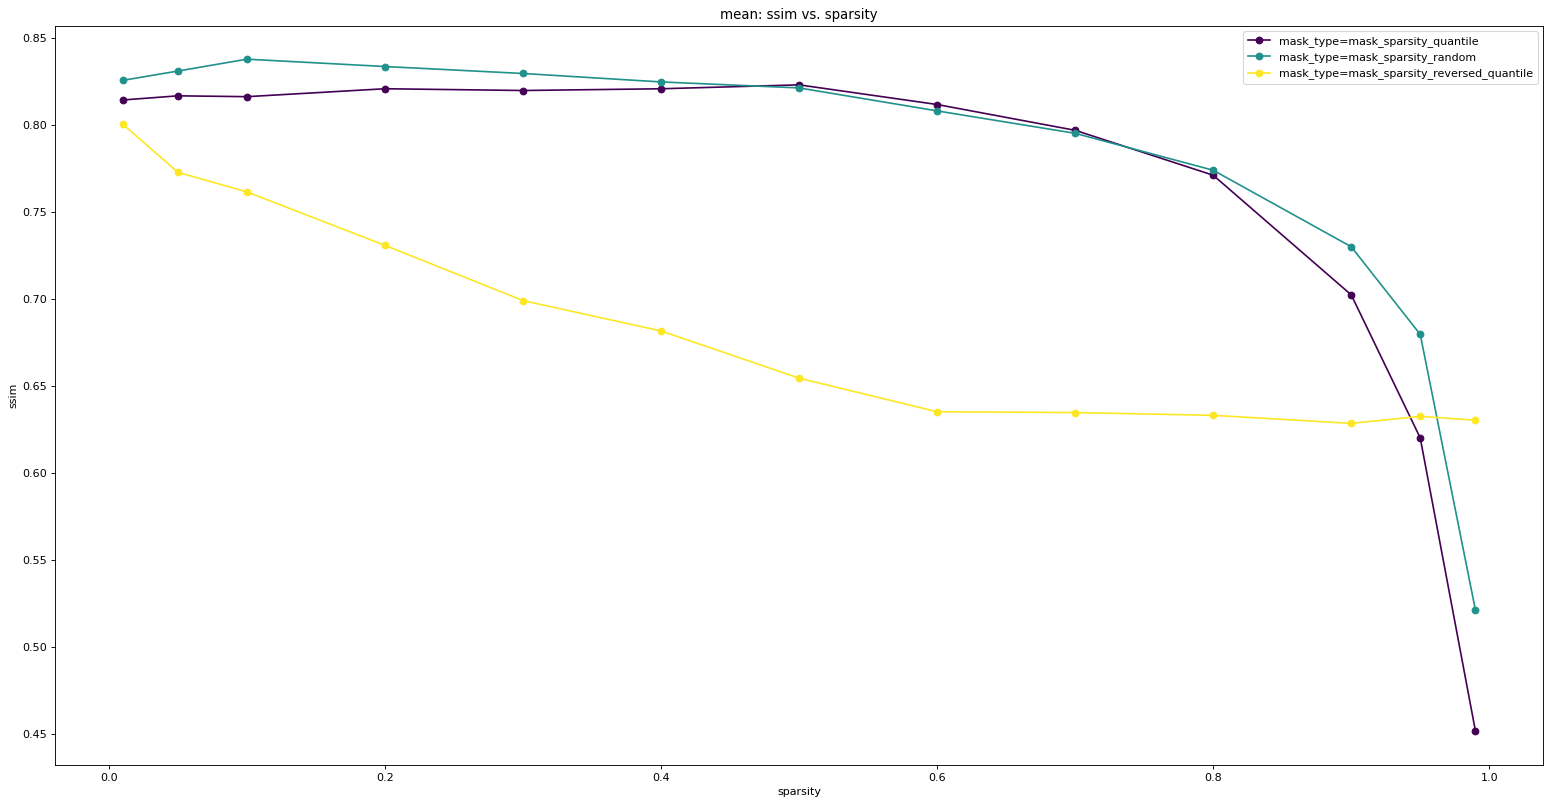

model: ['McMahan_32_32']
number of total experiment: 390
sparsity(13): [0.4  0.05 0.9  0.7  0.2  0.3  0.99 0.5  0.95 0.8  0.1  0.6  0.01]
['mask_type'](3): ['mask_sparsity_quantile' 'mask_sparsity_random'
 'mask_sparsity_reversed_quantile']
number of experiment for each (sparsity&['mask_type']): 10.0


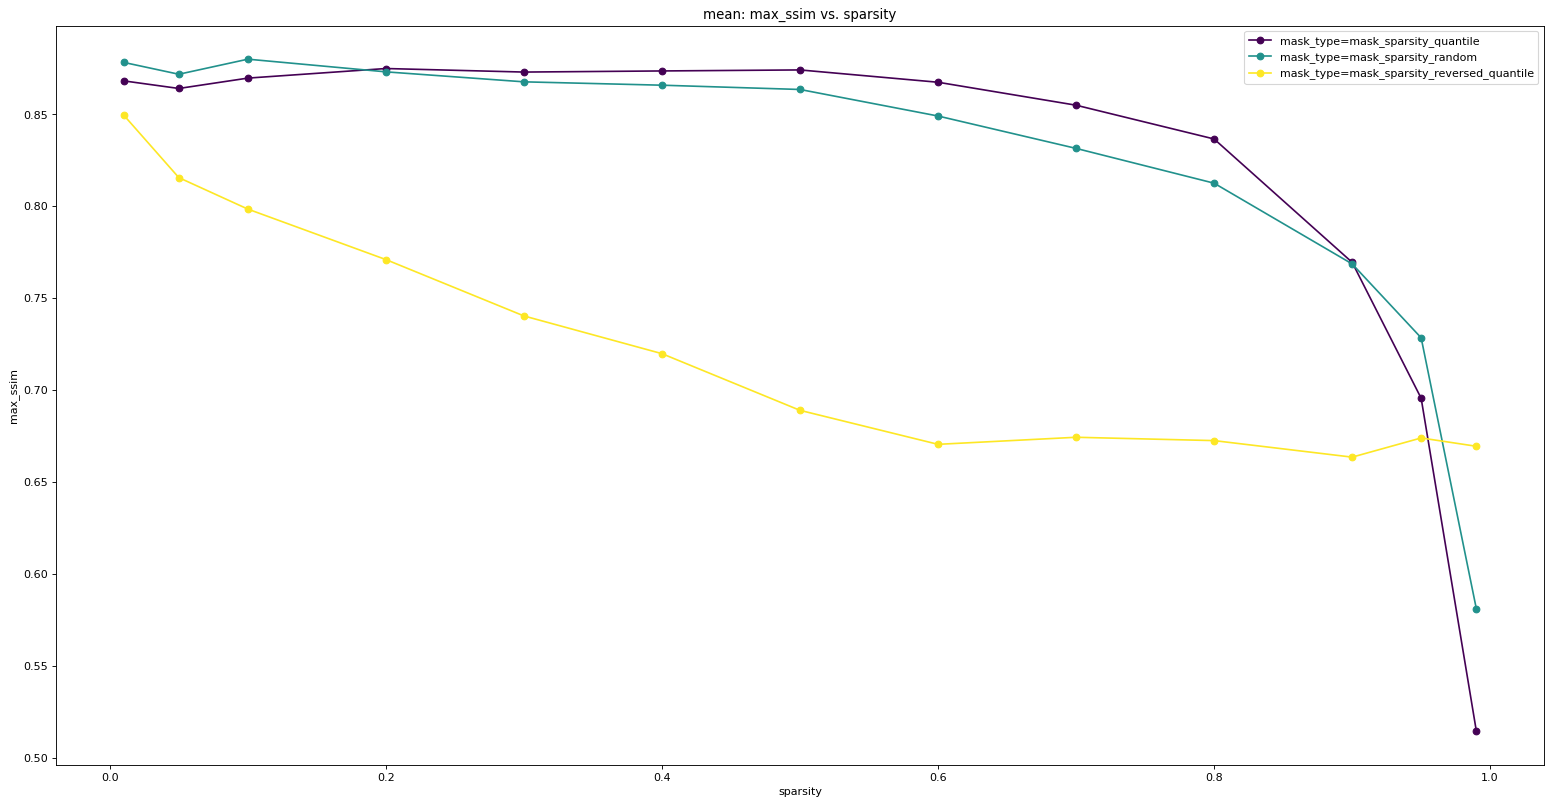

In [5]:
print(merged_df["model"].unique())
filtered_df = merged_df.loc[merged_df["model"] == "McMahan_32_32"]
print(filtered_df.shape)
print(filtered_df["datapoints"].unique())
filtered_df = filtered_df[filtered_df["datapoints"] == 4]
print(filtered_df.shape)
filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
print(filtered_df["mask_type"].unique())
print(filtered_df["attack"].unique())
analysis.plot_2d_df(filtered_df, y_axis="mask_type", loss_list=["ssim", "max_ssim"], metric_list=["mean"], x_axis="sparsity")

model: ['McMahan_32_32']
number of total experiment: 390
sparsity(13): [0.4  0.05 0.9  0.7  0.2  0.3  0.99 0.5  0.95 0.8  0.1  0.6  0.01]
mask_type(3): ['mask_sparsity_quantile' 'mask_sparsity_random'
 'mask_sparsity_reversed_quantile']
number of experiment for each (sparsity&mask_type): 10.0
0.4 0.0072363410145044 /volatile/home/pj273170/Code/Breaching/breaching/outputs/mask/2023-04-05/mask_sparsity_quantile/5/reconstructions/img_rec_CIFAR10_McMahan_32_32_user0.png
0.4 0.0072363410145044 /volatile/home/pj273170/Code/Breaching/breaching/outputs/mask/2023-04-05/mask_sparsity_quantile/5/reconstructions/img_rec_CIFAR10_McMahan_32_32_user0.png
0.4 0.0072363410145044 /volatile/home/pj273170/Code/Breaching/breaching/outputs/mask/2023-04-05/mask_sparsity_quantile/5/reconstructions/img_rec_CIFAR10_McMahan_32_32_user0.png


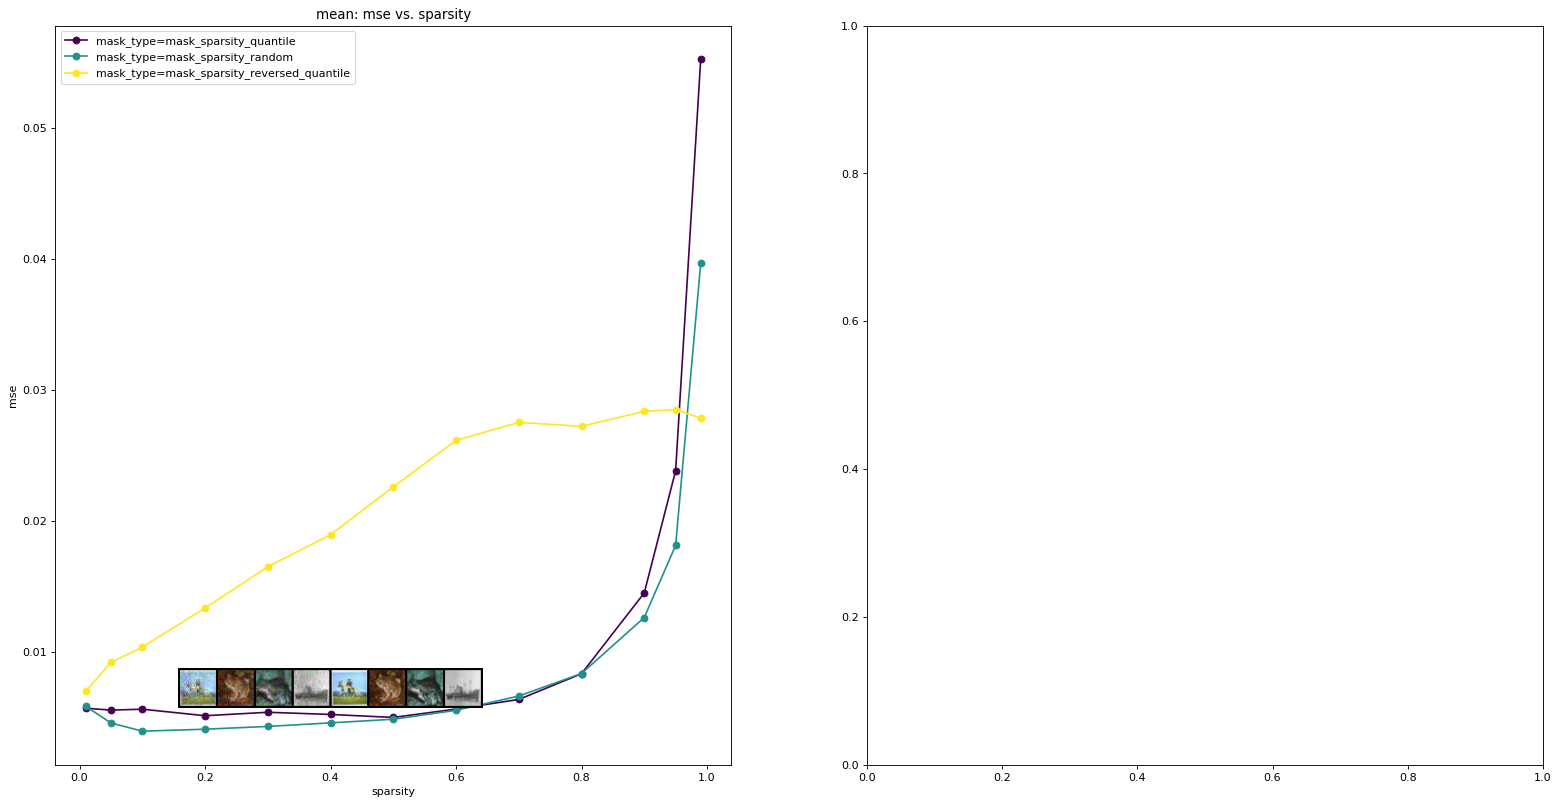

In [12]:
y_axis="mask_type"
x_axis="sparsity"
loss_list=["mse"]
metric_list=["mean"]
squeeze_dict={"mask_type": [("no_mask", "mask_sparsity_quantile")]}
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = copy.deepcopy(filtered_df)
# Extraire les valeurs de b et c de la colonne 'col3'
df["atk_type"] = df["ATK_objective"].str.extract(r"{'type': '(.+?)'")
df["mask_type"] = df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
df["mask_type"] = df["mask_type"].fillna("no_mask")
df["sparsity"] = df["ATK_objective"].str.extract(r"'sparsity': (\d+\.\d+)")
df["sparsity"] = df["sparsity"].fillna("0.0")
df["batch_size"] = df["datapoints"]
for key, value_tab in squeeze_dict.items():
    for val_1, val_2 in value_tab:
        df[key] = df[key].replace(val_1, val_2)
# Convertir les colonnes 'type' et 'sparsity' en type numérique
# df['type'] = pd.to_numeric(df['type'])
df["sparsity"] = pd.to_numeric(df["sparsity"])
nb_experiment = len(df)

model_list = df["model"].unique()
# nb_model = len(model_list)
x_list = df[x_axis].unique()
nb_x = len(x_list)
y_list = np.unique(df[y_axis])
nb_y = len(y_list)
for loss in loss_list:
    print(f"model: {model_list}")
    print(f"number of total experiment: {nb_experiment}")
    print(f"{x_axis}({nb_x}): {x_list}")
    print(f"{y_axis}({nb_y}): {y_list}")
    print(f"number of experiment for each ({x_axis}&{y_axis}): {nb_experiment / (nb_x * nb_y)}")
    if isinstance(y_axis, str):
        y_axis = [y_axis]
    grouped_df = df.groupby([x_axis, *y_axis])[loss].agg(metric_list)

    # Group by keywords dynamically
    grouped_df = df.groupby([x_axis, *y_axis])[loss].agg(metric_list)

    fig = plt.figure(figsize=(24, 12), dpi=80)
    ax = [fig.add_subplot(121), fig.add_subplot(122)]
    # Extract the unique values for each keyword
    keyword_values = np.stack(np.meshgrid(*[np.unique(df[y_ax]) for y_ax in y_axis]), -1).reshape(-1, len(y_axis))
    for i, metric in enumerate(metric_list):
        color = cm.viridis(np.linspace(0, 1, len(keyword_values)))
        j = 0
        # Create a separate plot for each keyword combination
        for keyword_value_pairs in keyword_values:
            # Filter the grouped dataframe for each keyword combination
            df_kw = grouped_df[
                np.logical_and.reduce(
                    [
                        (grouped_df.index.get_level_values(y_ax) == kw)
                        for y_ax, kw in zip(y_axis, keyword_value_pairs)
                    ]
                )
            ]
            legend = " and ".join(f"{y_ax}={kw}" for y_ax, kw in zip(y_axis, keyword_value_pairs))
            ax[i].plot(
                df_kw[metric].index.get_level_values(x_axis),
                df_kw[metric].values,
                marker="o",
                color=color[j],
                label=legend,
            )
            j += 1
            for _, row in df.iterrows():
                image_path = pathlib.Path(row["file_path"]).parent.parent / "reconstructions"
                for file in os.listdir(image_path):
                    if file.endswith("user0.png"):
                        image_path = image_path / file
                        break

                x_val = row[x_axis]
                y_val = row[loss]
                image = mpimg.imread(image_path)
                print(x_val, y_val, image_path)
                imagebox = OffsetImage(image, zoom=1.0)  # Adjust the zoom factor as needed
                ab = AnnotationBbox(imagebox, (x_val, y_val), frameon=False)
                ax[i].add_artist(ab)
                break
        ax[i].set_xlabel(x_axis)
        ax[i].set_ylabel(loss)
        ax[i].set_title(f"{metric}: {loss} vs. {x_axis}")
        ax[i].legend()
    plt.show()

model: ['custom_McMahan_32_32']
number of total experiment: 140
mask_type(1): ['mask_sparsity_quantile']
sparsity(14): [0.6  0.3  0.2  0.05 0.4  0.9  0.99 0.8  0.1  0.5  0.01 0.95 0.7  0.  ]
number of experiment for each (mask type&sparsity level): 10.0
[0.02431828 0.02506948 0.02476391 0.02553705 0.02682839 0.02572809
 0.02996003 0.03213088 0.03615274 0.04165367 0.05417207 0.06894687
 0.08214341 0.11373701]
[1.42581592e-06 5.32372644e-06 2.08280141e-06 5.37817764e-06
 7.70524152e-06 1.82456289e-06 4.39905102e-06 4.47354304e-06
 1.04861174e-05 1.55703705e-05 1.94969594e-05 2.25430920e-05
 4.04151693e-05 5.10527157e-05]


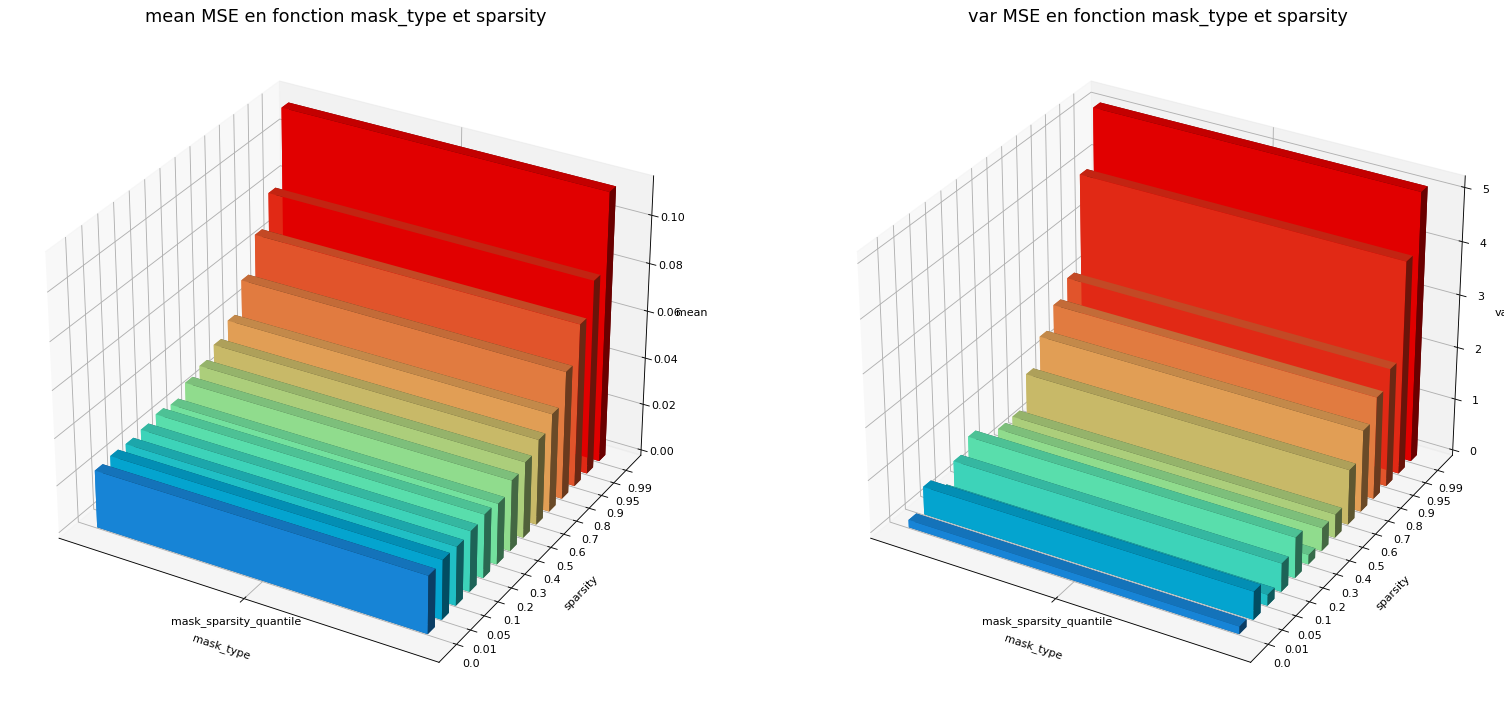

model: ['custom_McMahan_32_32']
number of total experiment: 140
mask_type(1): ['mask_sparsity_quantile']
sparsity(14): [0.6  0.3  0.2  0.05 0.4  0.9  0.99 0.8  0.1  0.5  0.01 0.95 0.7  0.  ]
number of experiment for each (mask type&sparsity level): 10.0
[0.61136246 0.60738514 0.61130267 0.60543322 0.59638818 0.60002976
 0.57225701 0.55211066 0.53003557 0.49630865 0.43317908 0.37971059
 0.35170218 0.30901979]
[0.00014344 0.0001563  0.00022892 0.00036276 0.00013846 0.00018945
 0.00040854 0.00029073 0.00045149 0.00043321 0.00034646 0.00032294
 0.00022521 0.00031958]


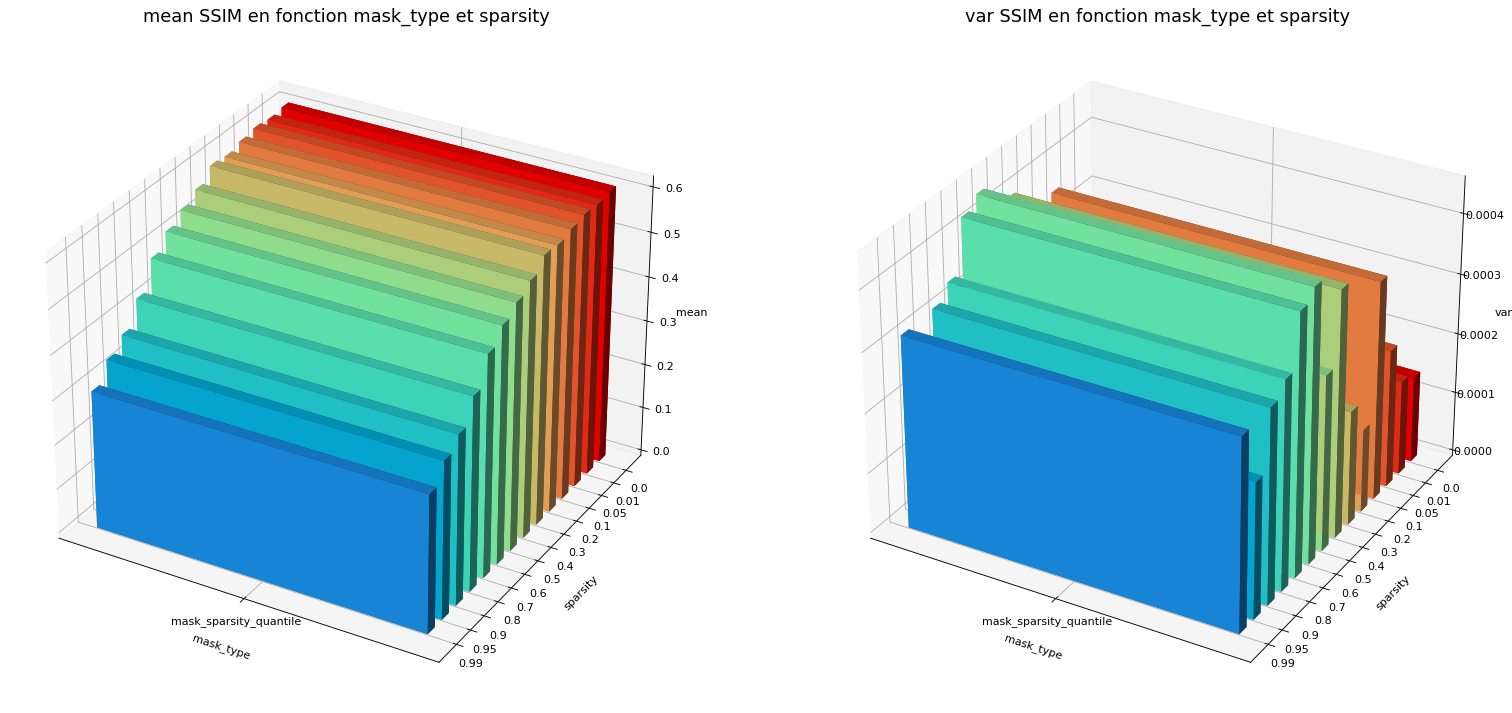

model: ['custom_McMahan_32_32']
number of total experiment: 140
mask_type(1): ['mask_sparsity_quantile']
sparsity(14): [0.6  0.3  0.2  0.05 0.4  0.9  0.99 0.8  0.1  0.5  0.01 0.95 0.7  0.  ]
number of experiment for each (mask type&sparsity level): 10.0
[16.38513145 16.27894526 16.32287121 16.2421999  16.04503689 16.12547722
 15.52782679 15.22384014 14.74985771 14.13548803 12.98601046 11.91550293
 11.11713772  9.62501554]
[0.0414377  0.10106449 0.05237747 0.10053608 0.09920994 0.03838218
 0.07618125 0.07684293 0.11909127 0.15837695 0.07542422 0.10084324
 0.11547657 0.08528493]


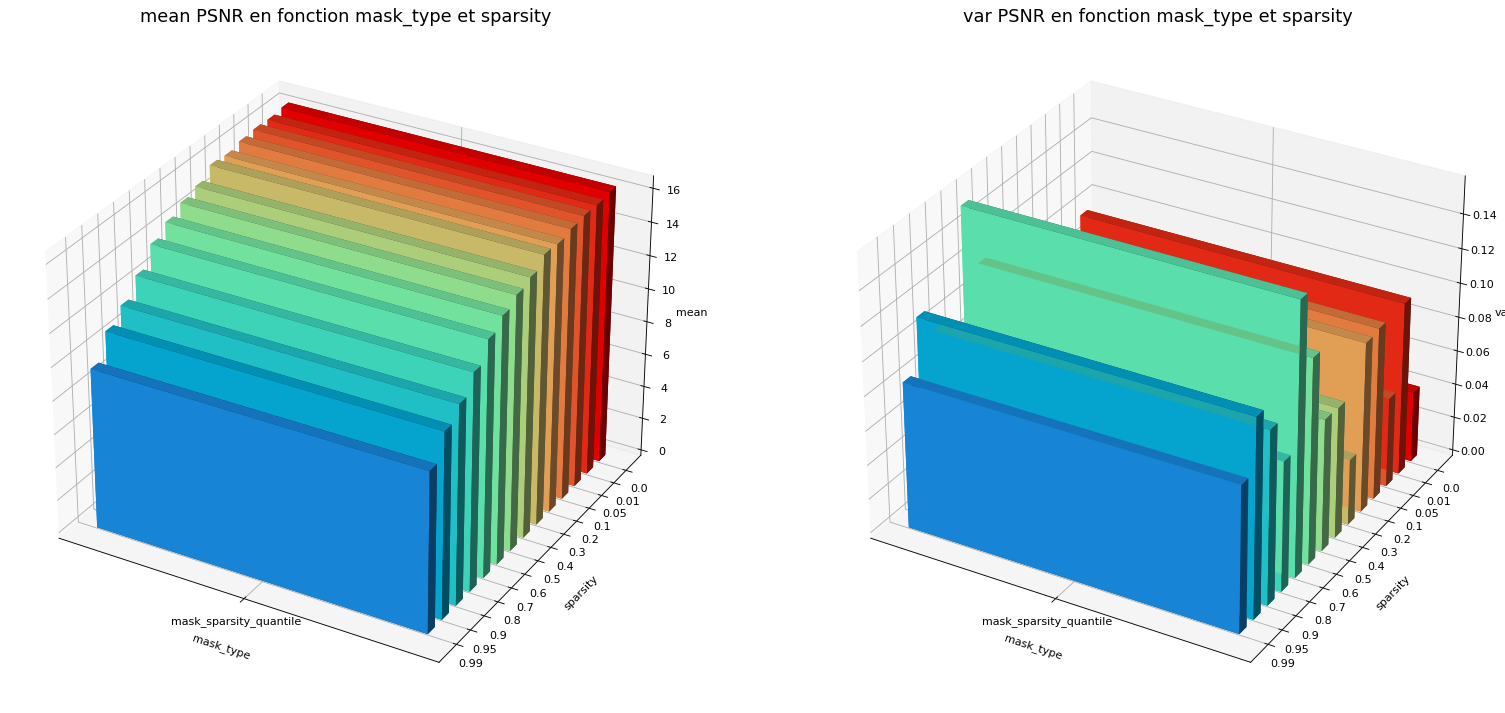

In [19]:
filtered_df = merged_df.loc[merged_df["file_path"].str.contains("14-31-54")]
filtered_df = filtered_df.loc[filtered_df["datapoints"]==32]
analysis.plot_df(filtered_df, x_axis="mask_type", y_axis="sparsity")

model: ['custom_McMahan_32_32']
number of total experiment: 140
mask_type(1): ['mask_sparsity_quantile']
sparsity(14): [0.6  0.05 0.   0.01 0.7  0.4  0.95 0.3  0.2  0.8  0.1  0.9  0.99 0.5 ]
number of experiment for each (mask type&sparsity level): 10.0
[0.0503867  0.05029284 0.04940128 0.05024539 0.05094759 0.05230566
 0.05482122 0.05543346 0.05748066 0.06320453 0.06727595 0.07885312
 0.09138307 0.12098377]
[2.72687892e-05 1.45310961e-05 7.60407623e-06 1.16412760e-05
 2.07383695e-05 2.01574891e-05 1.05492038e-05 1.20334056e-05
 1.04860337e-05 2.48008144e-05 1.09952106e-05 1.46145664e-05
 2.10586463e-05 1.79859878e-05]


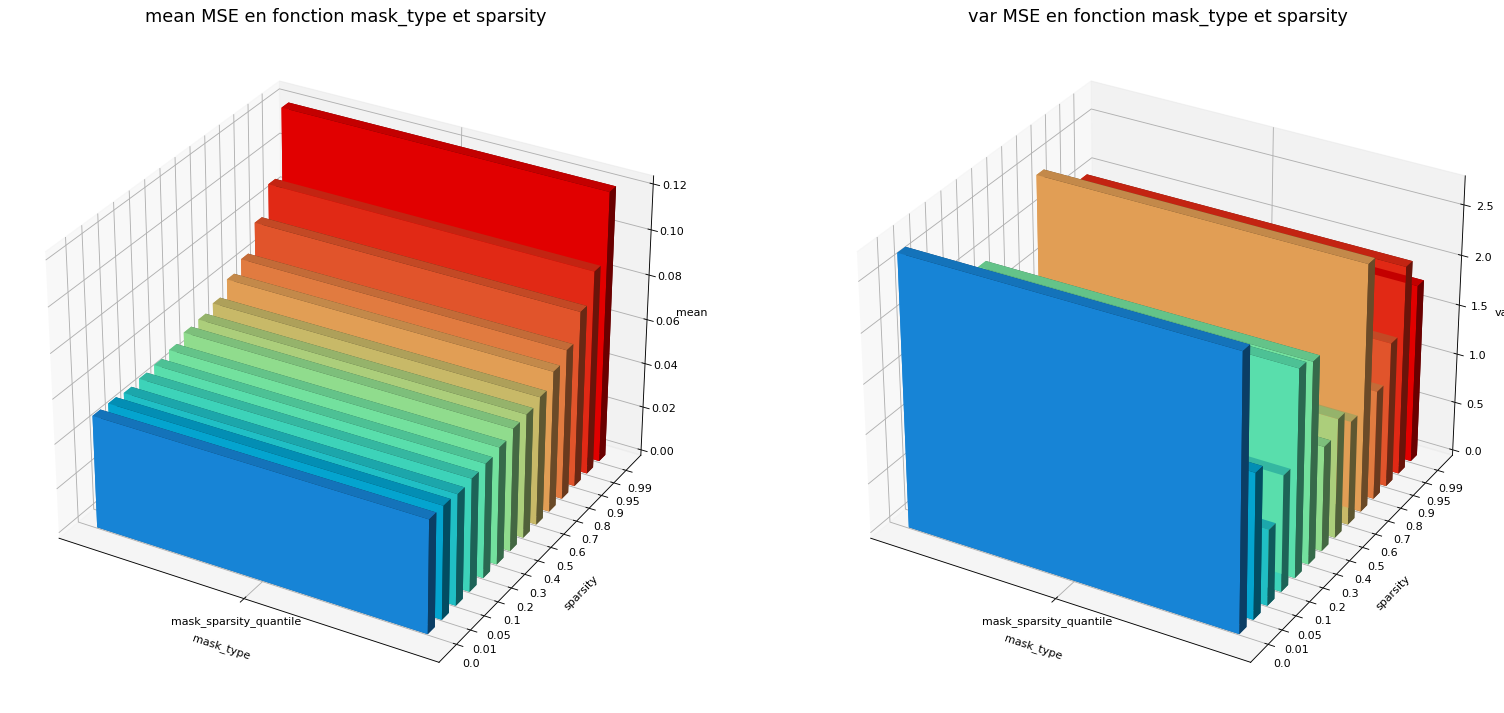

model: ['custom_McMahan_32_32']
number of total experiment: 140
mask_type(1): ['mask_sparsity_quantile']
sparsity(14): [0.6  0.05 0.   0.01 0.7  0.4  0.95 0.3  0.2  0.8  0.1  0.9  0.99 0.5 ]
number of experiment for each (mask type&sparsity level): 10.0
[0.4285639  0.42939233 0.42929995 0.42576704 0.4238745  0.41476083
 0.40593946 0.40093377 0.39265988 0.36956164 0.35617701 0.33541915
 0.32253162 0.28754762]
[5.56876104e-04 3.49238301e-04 2.31220513e-04 5.39680575e-04
 4.02944850e-04 4.38903554e-04 2.86111153e-04 2.29707030e-04
 1.31234804e-04 1.91766809e-04 7.70971925e-05 1.57812450e-04
 7.28078694e-05 6.63017809e-05]


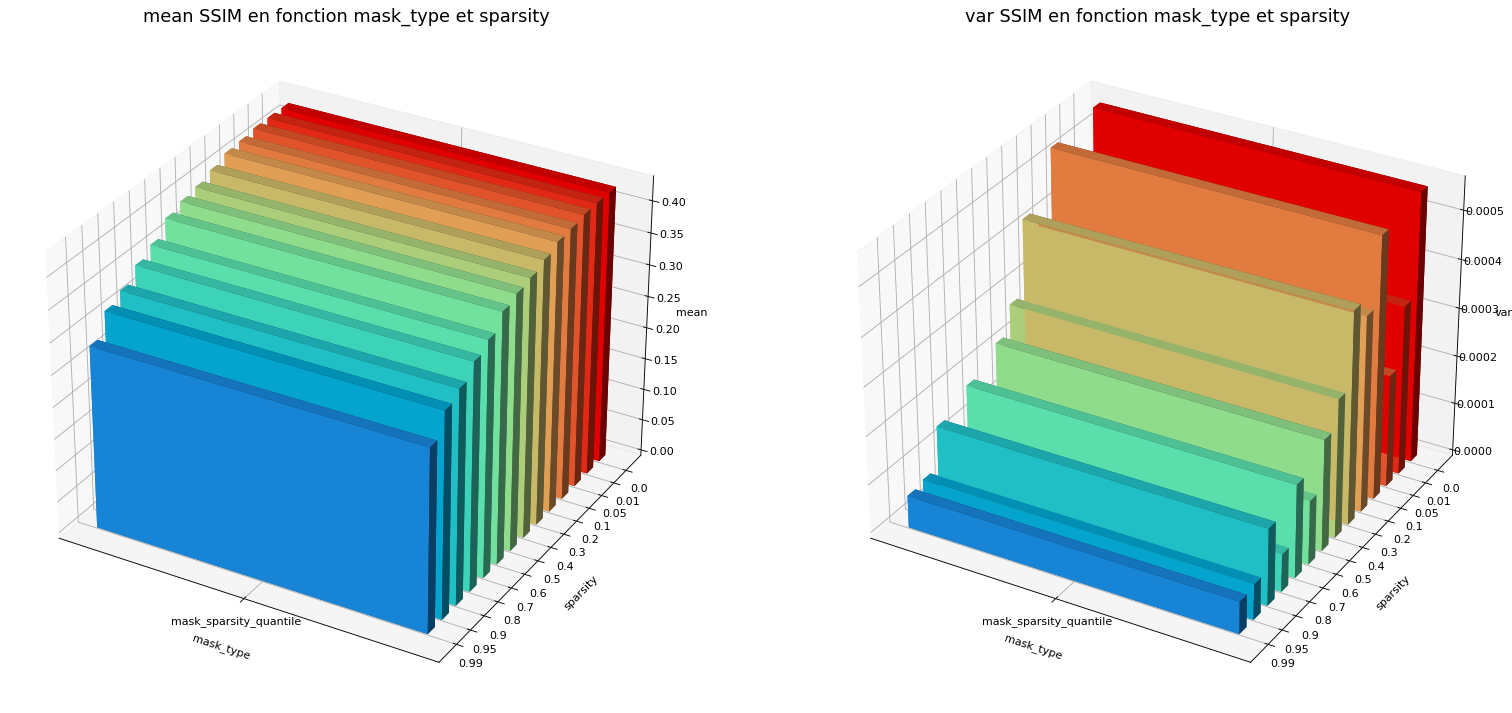

model: ['custom_McMahan_32_32']
number of total experiment: 140
mask_type(1): ['mask_sparsity_quantile']
sparsity(14): [0.6  0.05 0.   0.01 0.7  0.4  0.95 0.3  0.2  0.8  0.1  0.9  0.99 0.5 ]
number of experiment for each (mask type&sparsity level): 10.0
[13.43629293 13.41310873 13.50173798 13.39831009 13.36514473 13.21586714
 13.04500589 12.94269524 12.77604065 12.37771015 12.0576292  11.34064255
 10.65535021  9.34951963]
[0.17513797 0.09355166 0.04829494 0.1159236  0.15072004 0.14831195
 0.07341675 0.06760054 0.04587616 0.09218192 0.04345869 0.04764772
 0.03642847 0.01822846]


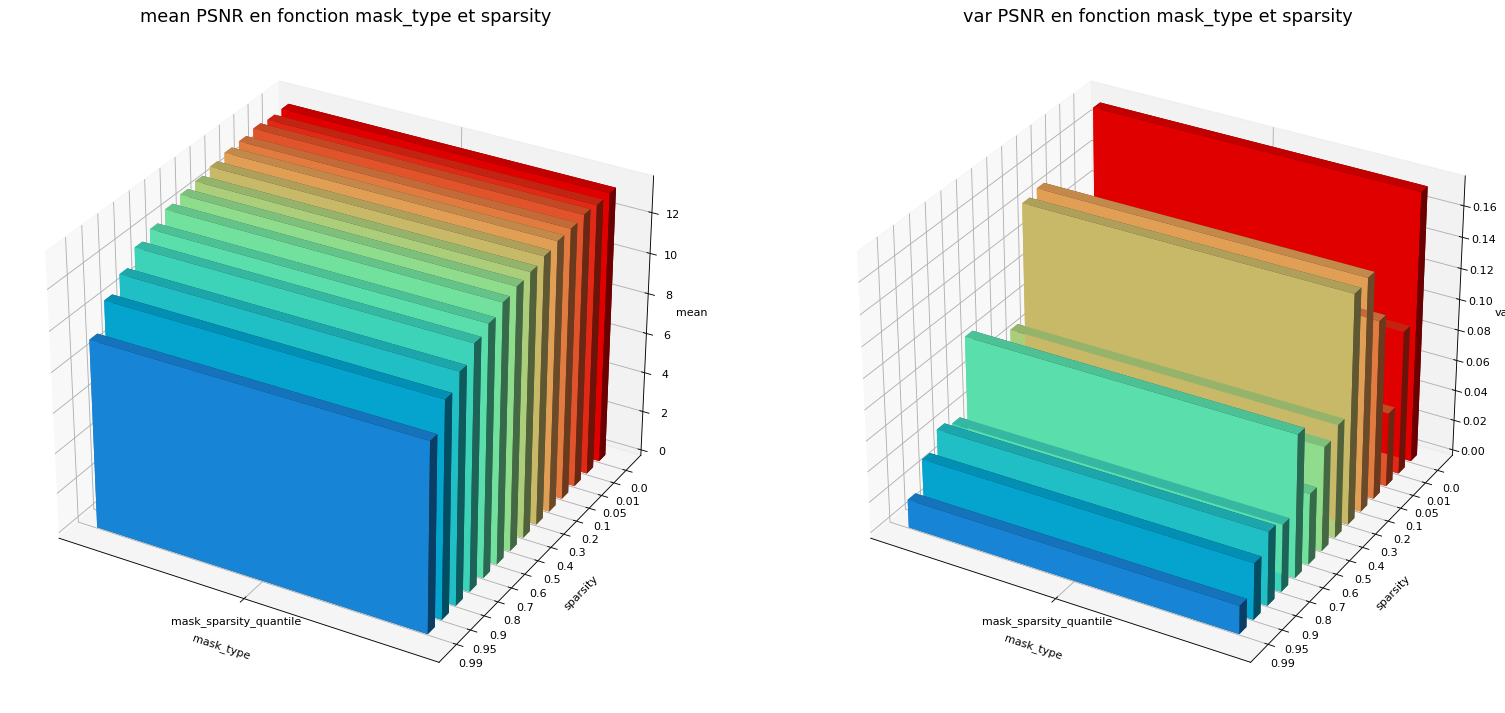

In [2]:
filtered_df = merged_df.loc[merged_df["file_path"].str.contains("14-31-54")]
filtered_df = filtered_df.loc[filtered_df["datapoints"]==64]
analysis.plot_df(filtered_df, x_axis="mask_type", y_axis="sparsity")

model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 290
attack(2): ['deep-leakage' 'invertinggradients']
sparsity(14): [0.   0.3  0.01 0.8  0.6  0.1  0.2  0.99 0.95 0.4  0.9  0.7  0.05 0.5 ]
number of experiment for each (mask type&sparsity level): 10.357142857142858


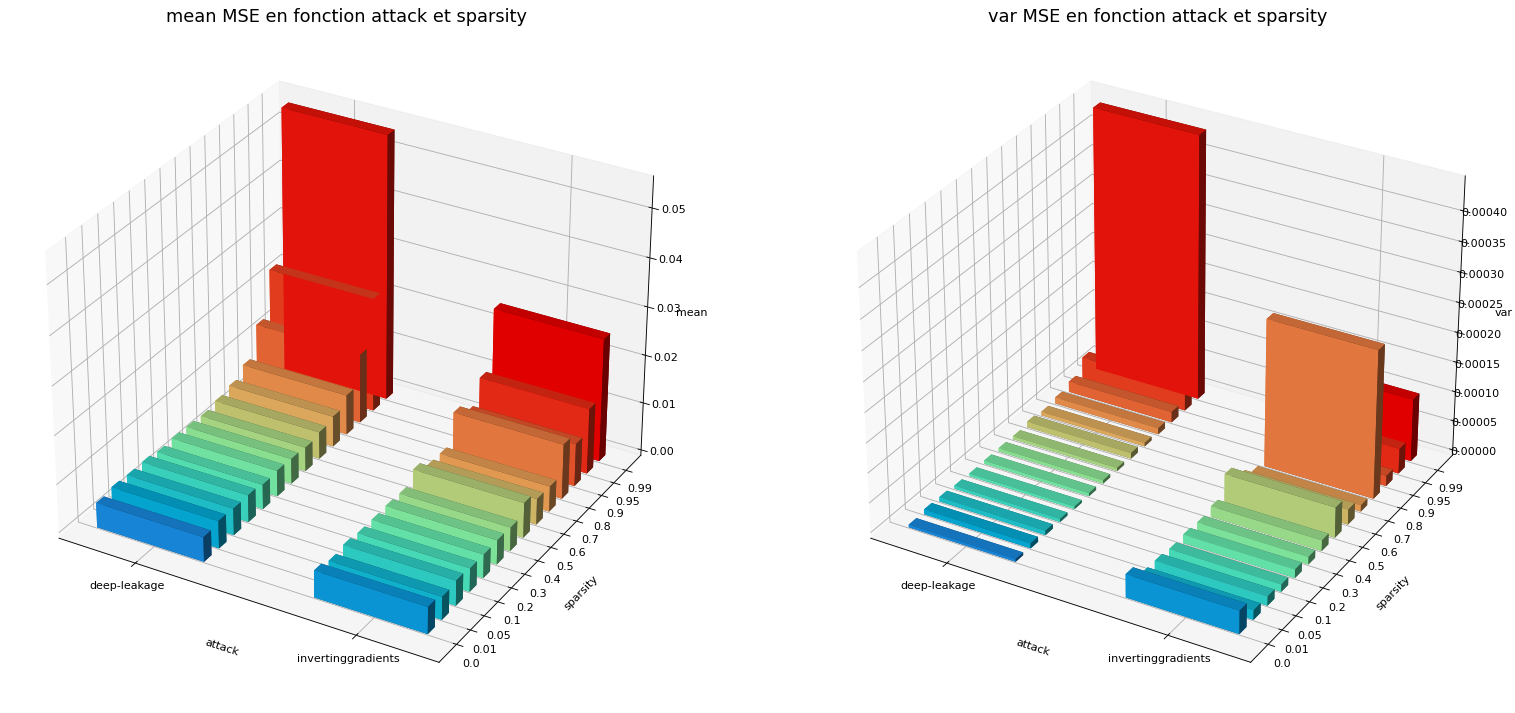

model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 290
attack(2): ['deep-leakage' 'invertinggradients']
sparsity(14): [0.   0.3  0.01 0.8  0.6  0.1  0.2  0.99 0.95 0.4  0.9  0.7  0.05 0.5 ]
number of experiment for each (mask type&sparsity level): 10.357142857142858


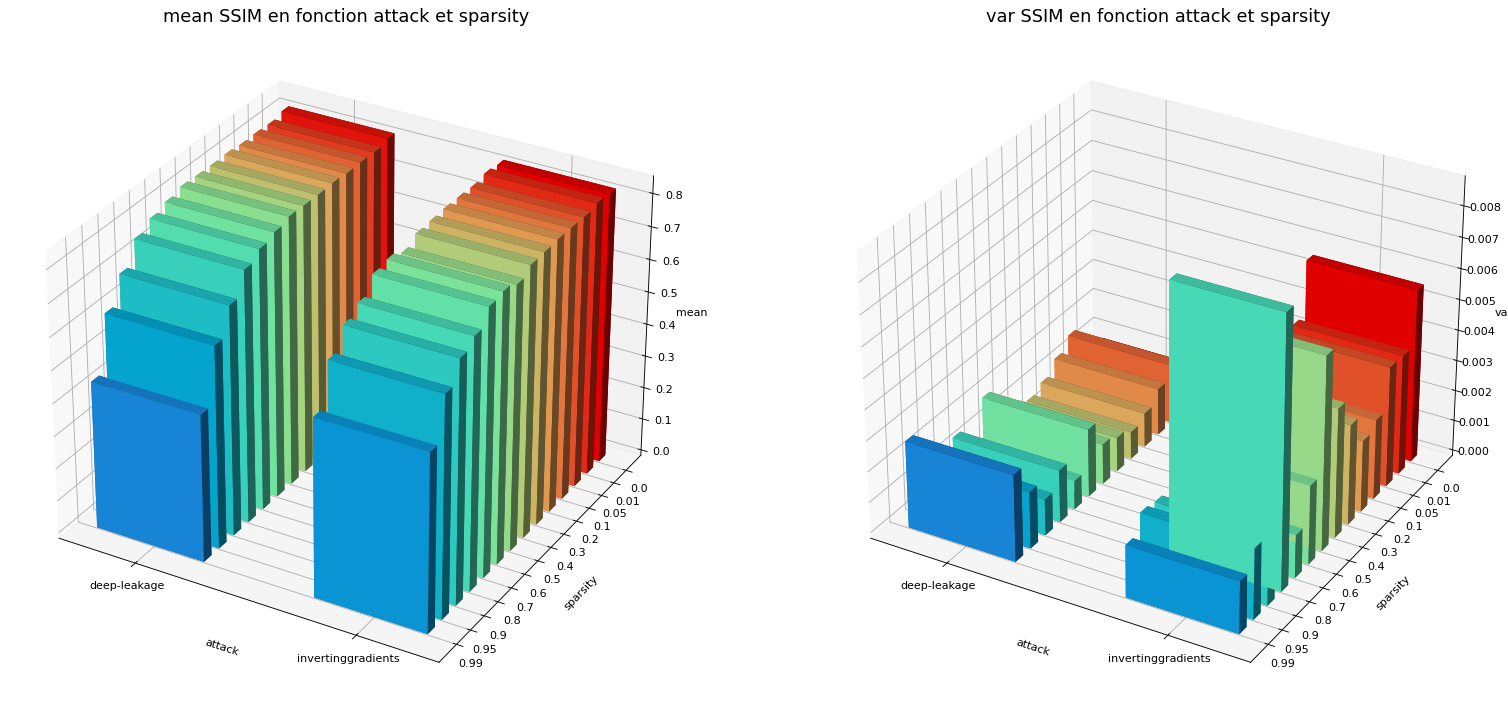

model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 290
attack(2): ['deep-leakage' 'invertinggradients']
sparsity(14): [0.   0.3  0.01 0.8  0.6  0.1  0.2  0.99 0.95 0.4  0.9  0.7  0.05 0.5 ]
number of experiment for each (mask type&sparsity level): 10.357142857142858


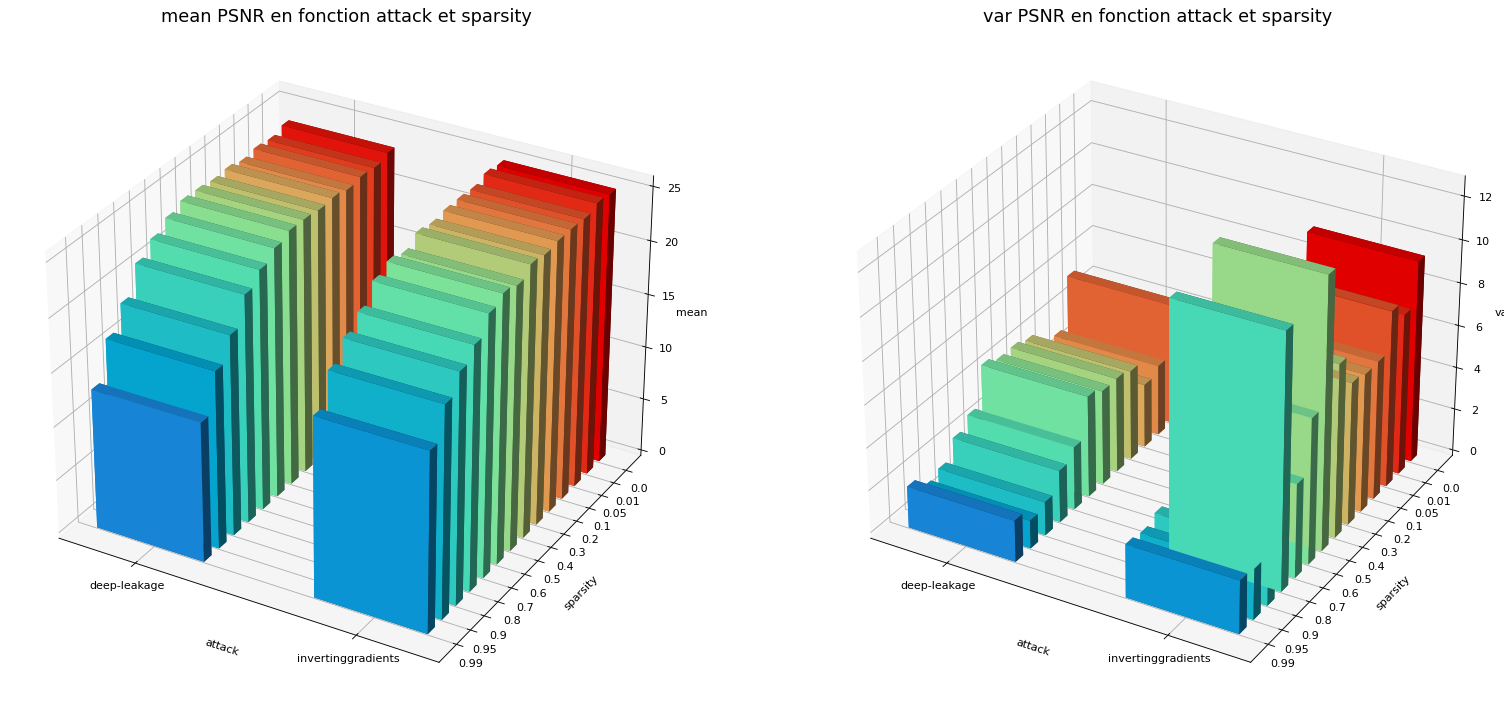

In [27]:
# Construct filtered df and add stuff
filtered_df = merged_df.loc[merged_df["model"].str.contains("McMahan_32_32")]
filtered_df = filtered_df[filtered_df["datapoints"] == 4]
filtered_df["mask_type"] = filtered_df["ATK_objective"].str.extract(r": {'type': '(.+?)'")
filtered_df['mask_type'] = filtered_df['mask_type'].fillna("no_mask")
filtered_df["mask_type"] = filtered_df["mask_type"].replace("no_mask", "mask_sparsity_quantile")
filtered_df["sparsity"] = filtered_df["ATK_objective"].str.extract(r"'sparsity': (\d+\.\d+)")
filtered_df['sparsity'] = filtered_df['sparsity'].fillna('0.0')

filtered_df = filtered_df.loc[filtered_df["mask_type"].str.contains("mask_sparsity_quantile")]
# grouped_df = filtered_df.groupby([x_axis, y_axis])["mse"].agg("mean")
# print(grouped_df)
# filtered_df = filtered_df.loc[filtered_df["attack"] == "invertinggradients"]

analysis.plot_df(filtered_df, x_axis="attack", y_axis="sparsity")

# (8,) [0.00682827 0.00443798 0.00603323 0.00580797 0.0114076  0.02408931
#  0.04849106 0.06015081]
# (8,) [3.00652204e-05 8.73452251e-06 6.66846658e-05 1.18166247e-05
#  1.89482970e-05 1.71784828e-05 1.22814940e-05 9.90334512e-06]

In [16]:
filtered_df = merged_df.loc[merged_df["file_path"].str.contains("mask_batch_size")]

print(filtered_df.loc[filtered_df["datapoints"]==16]["ssim"].mean())
print(filtered_df.loc[filtered_df["datapoints"]==16]["max_ssim"].mean())


print(filtered_df.loc[filtered_df["datapoints"]==64]["ssim"].mean())
print(filtered_df.loc[filtered_df["datapoints"]==64]["max_ssim"].mean())




0.7275961697101593
0.8204385966062546
0.3943622976541519
0.6404802441596985


(3728, 52)
(1308, 52)
(1192, 52)
(1192, 52)
model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 1192
params_ratio(11): [0.07122685 0.02849074 0.14245371 0.02279259 0.0113963  0.09117037
 0.04558519 0.00284907 0.00569815 0.18234075 0.00142454]
attack(2): ['deep-leakage' 'invertinggradients']
number of experiment for each (params_ratio&attack): 54.18181818181818


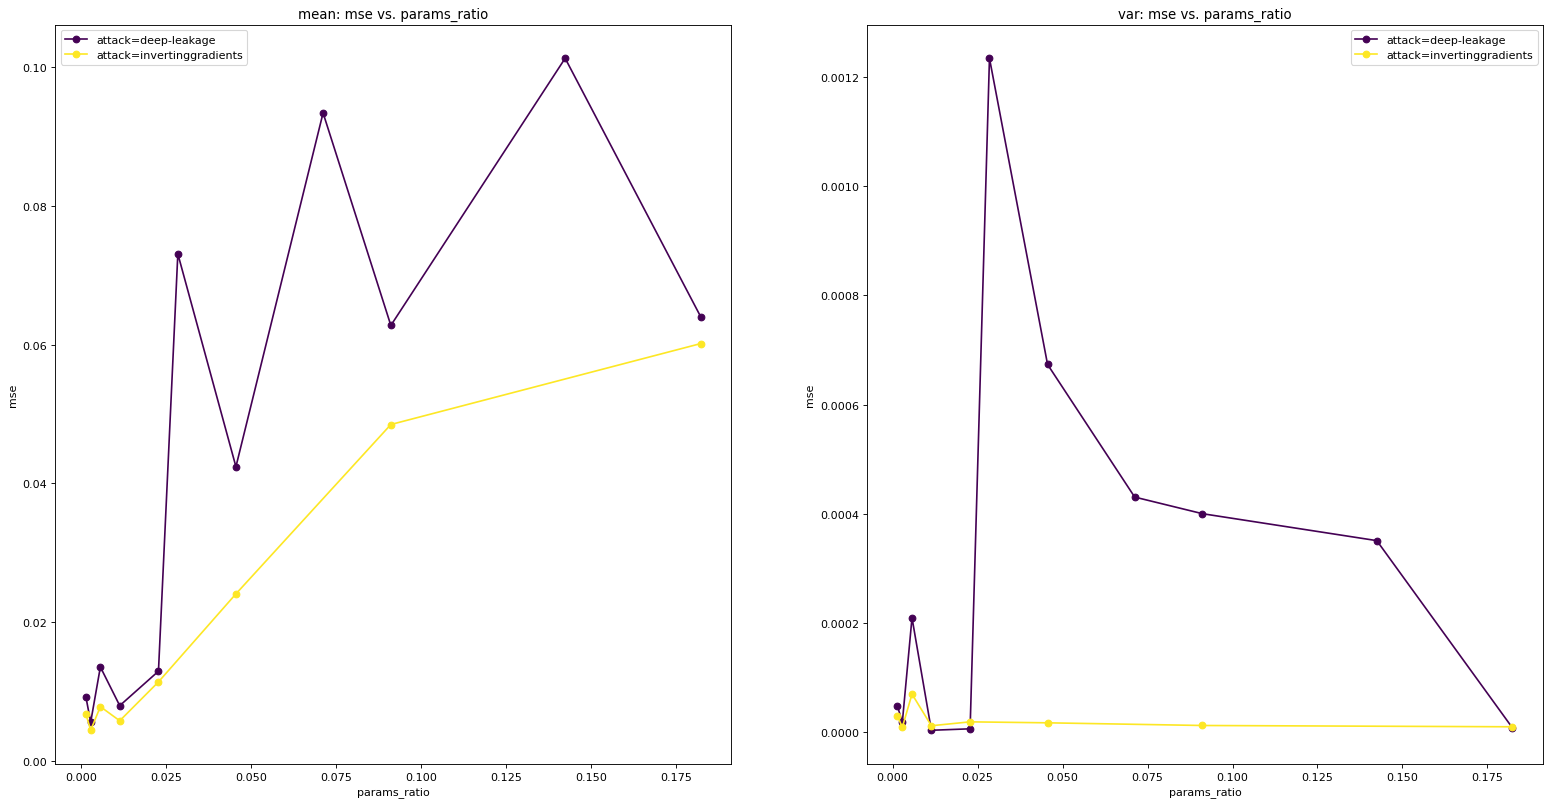

model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 1192
params_ratio(11): [0.07122685 0.02849074 0.14245371 0.02279259 0.0113963  0.09117037
 0.04558519 0.00284907 0.00569815 0.18234075 0.00142454]
['attack'](2): ['deep-leakage' 'invertinggradients']
number of experiment for each (params_ratio&['attack']): 54.18181818181818


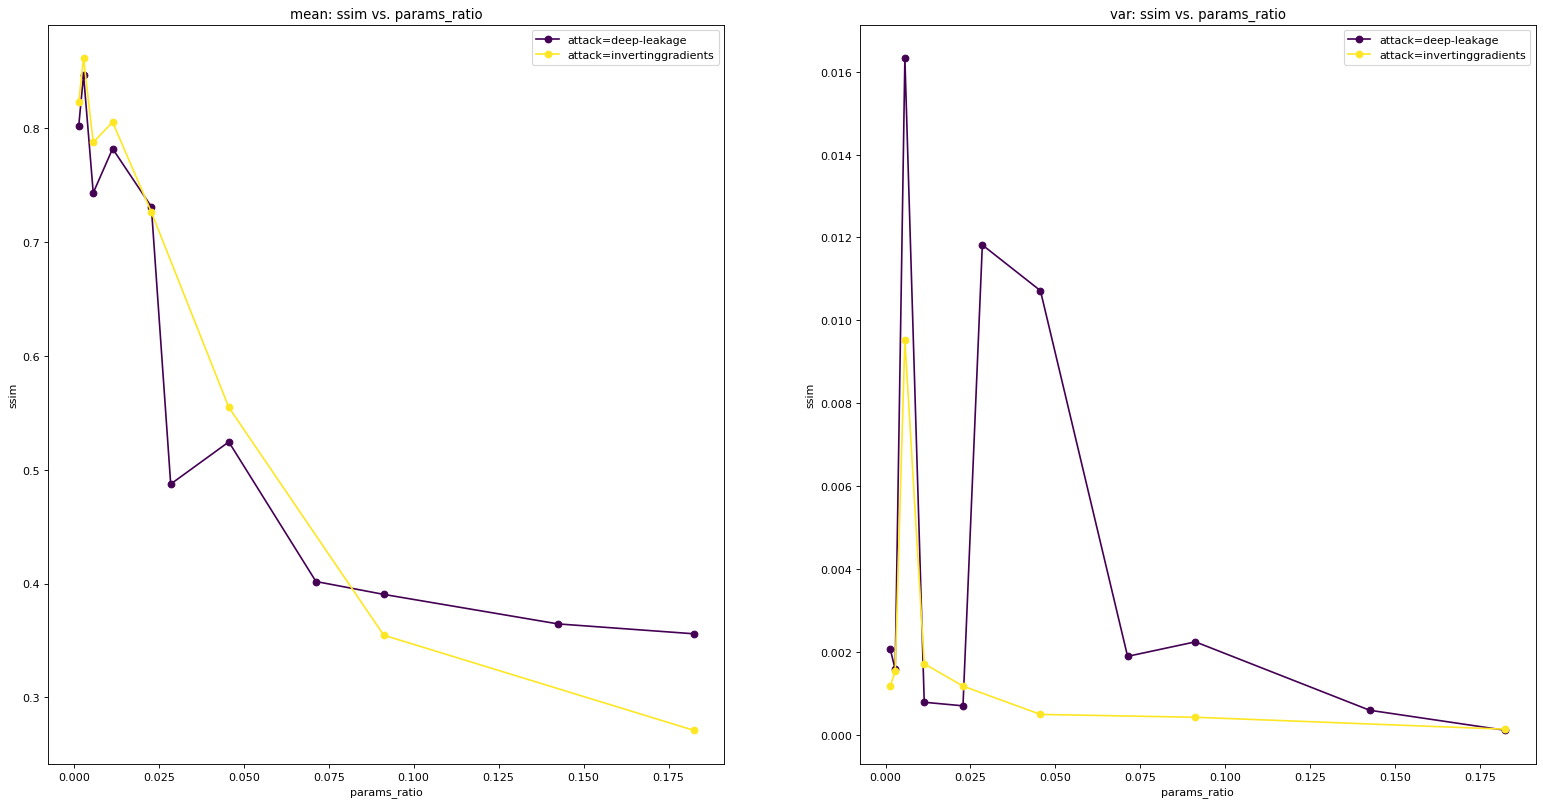

model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 1192
params_ratio(11): [0.07122685 0.02849074 0.14245371 0.02279259 0.0113963  0.09117037
 0.04558519 0.00284907 0.00569815 0.18234075 0.00142454]
['attack'](2): ['deep-leakage' 'invertinggradients']
number of experiment for each (params_ratio&['attack']): 54.18181818181818


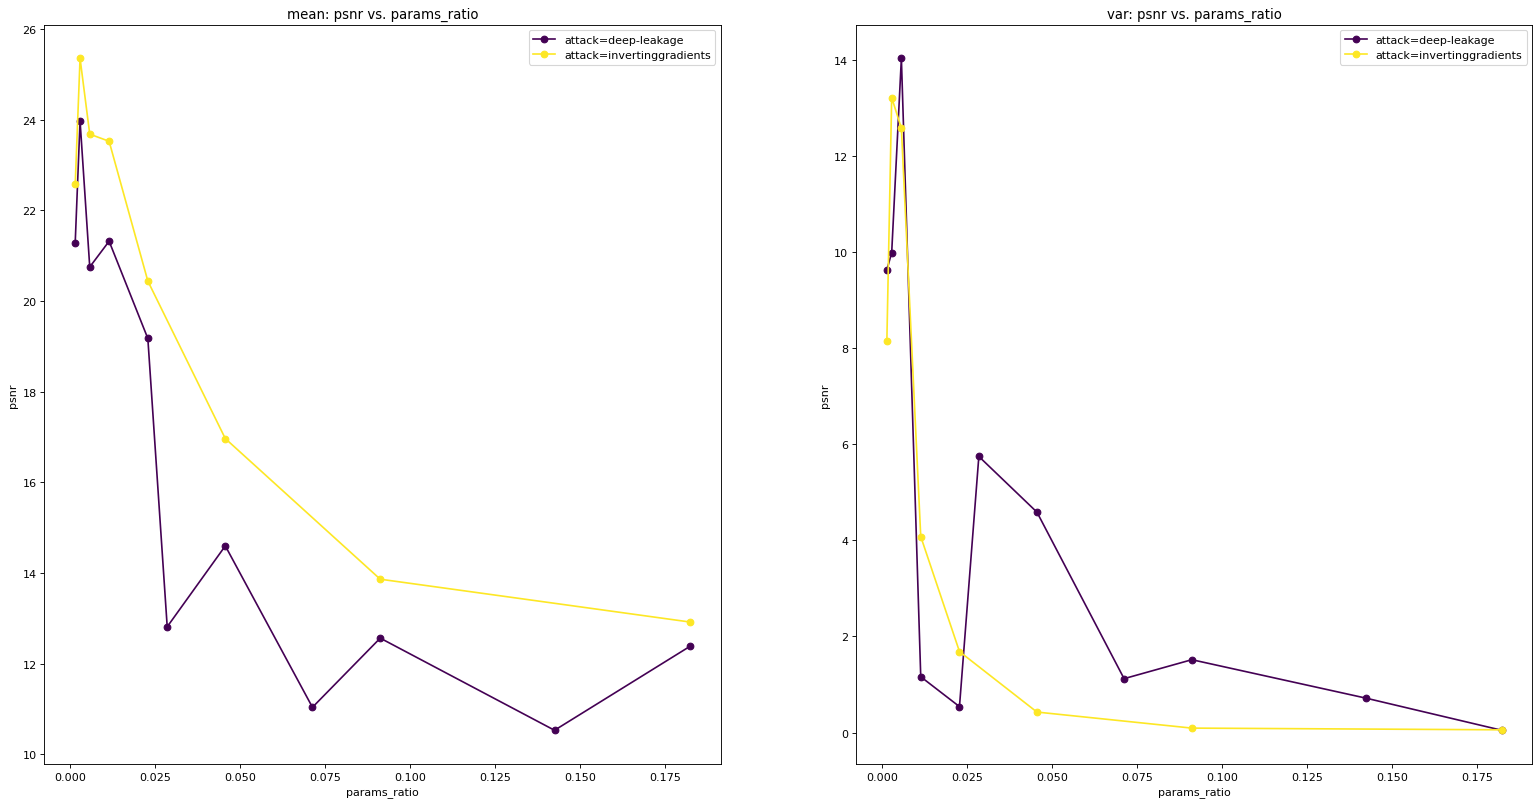

model: ['custom_McMahan_32_32' 'McMahan_32_32']
number of total experiment: 1192
params_ratio(11): [0.07122685 0.02849074 0.14245371 0.02279259 0.0113963  0.09117037
 0.04558519 0.00284907 0.00569815 0.18234075 0.00142454]
['attack'](2): ['deep-leakage' 'invertinggradients']
number of experiment for each (params_ratio&['attack']): 54.18181818181818


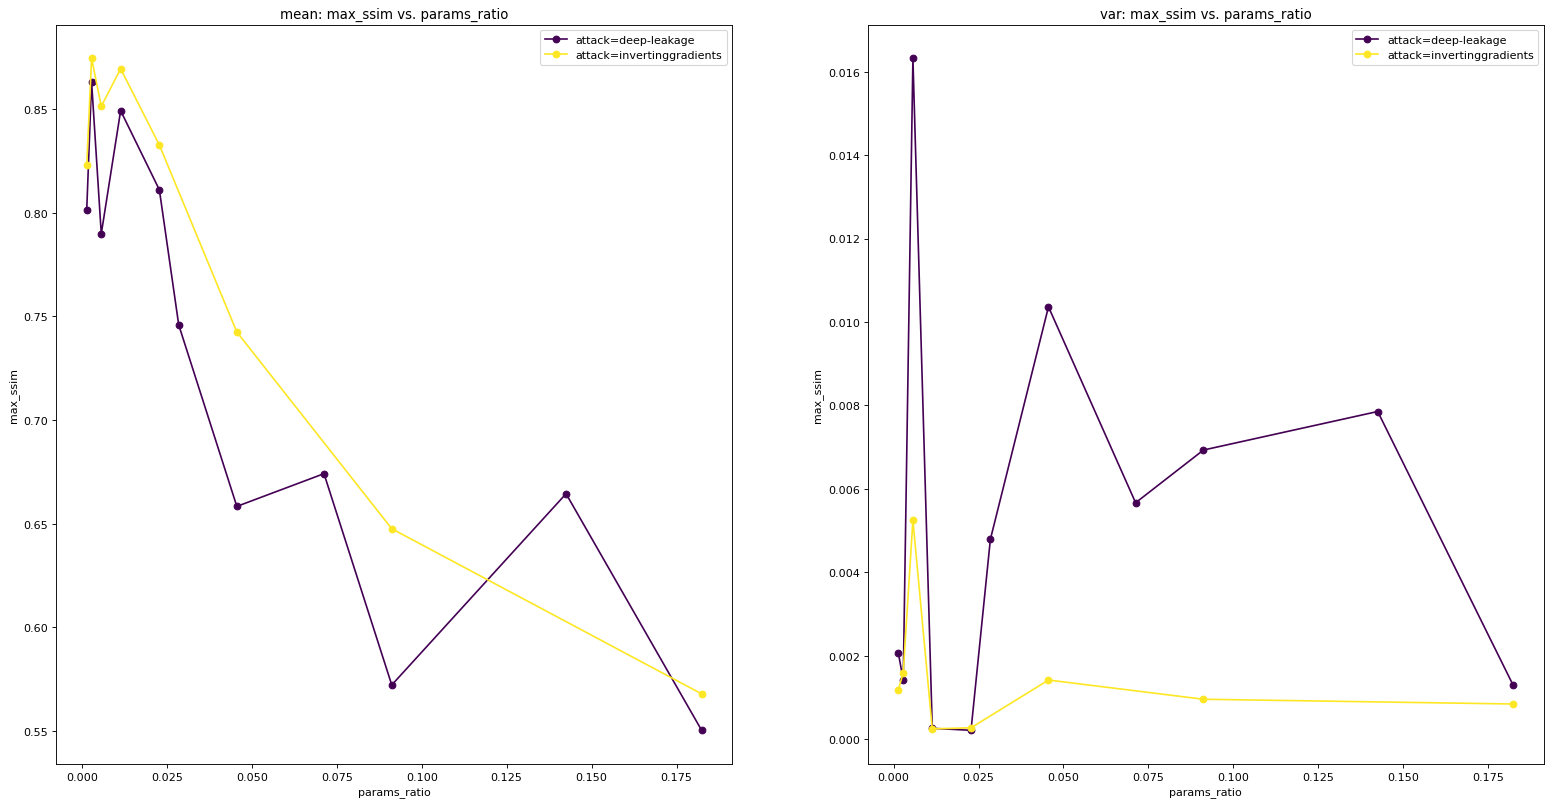

In [9]:
print(merged_df.shape)
# print(merged_df["model"].unique())
filtered_df = merged_df.loc[merged_df["model"].str.contains("McMahan_32_32")]
print(filtered_df.shape)
filtered_df = filtered_df.loc[(filtered_df["attack"] == "deep-leakage") | (filtered_df["attack"] == "invertinggradients")]
print(filtered_df.shape)
filetered_df = filtered_df.loc[filtered_df["ATK_label_strategy"] == None]
print(filtered_df.shape)

filtered_df["model_parameters"] = filtered_df["parameters"] * filtered_df.get("sparsity", default=1.)
filtered_df["recovered_parameters"] = filtered_df["datapoints"] * 32 * 32 * 3
filtered_df["params_ratio"] = filtered_df["recovered_parameters"] / filtered_df["model_parameters"]

analysis.plot_2d_df(filtered_df, x_axis="params_ratio", y_axis="attack", loss_list=["mse", "ssim", "psnr", "max_ssim"])

# analysis.plot_2d_df(filtered_df, x_axis="batch_size", y_axis="attack", loss_list=["ssim", "max_ssim"])

(3364, 47)
(160, 47)
model: ['custom_McMahan_32_32']
number of total experiment: 160
batch_size(8): [ 32   2   8  16  64   4 128   1]
attack(2): ['deep-leakage' 'invertinggradients']
number of experiment for each (batch_size&attack): 10.0


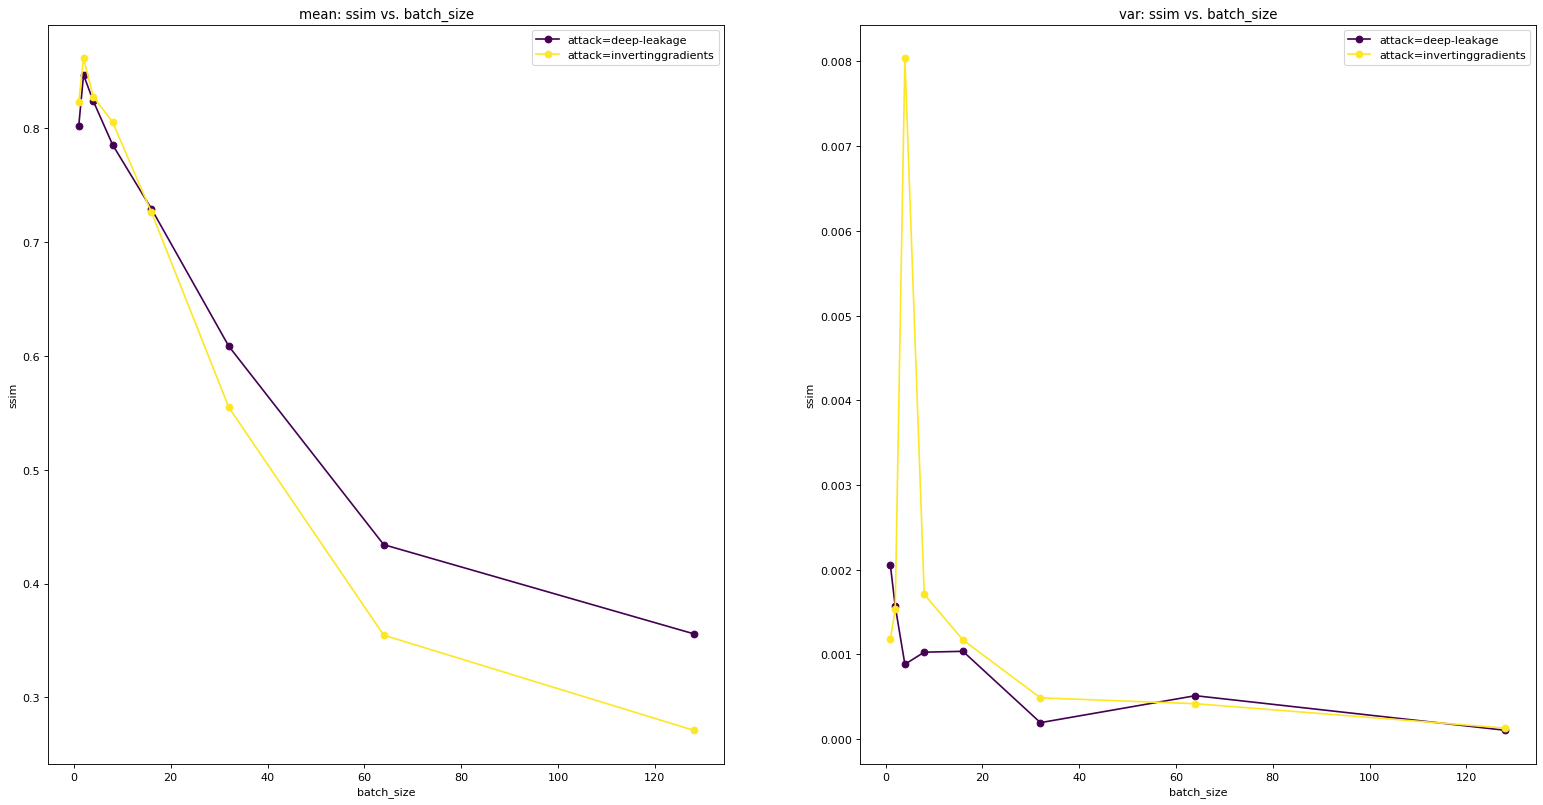

model: ['custom_McMahan_32_32']
number of total experiment: 160
batch_size(8): [ 32   2   8  16  64   4 128   1]
['attack'](2): ['deep-leakage' 'invertinggradients']
number of experiment for each (batch_size&['attack']): 10.0


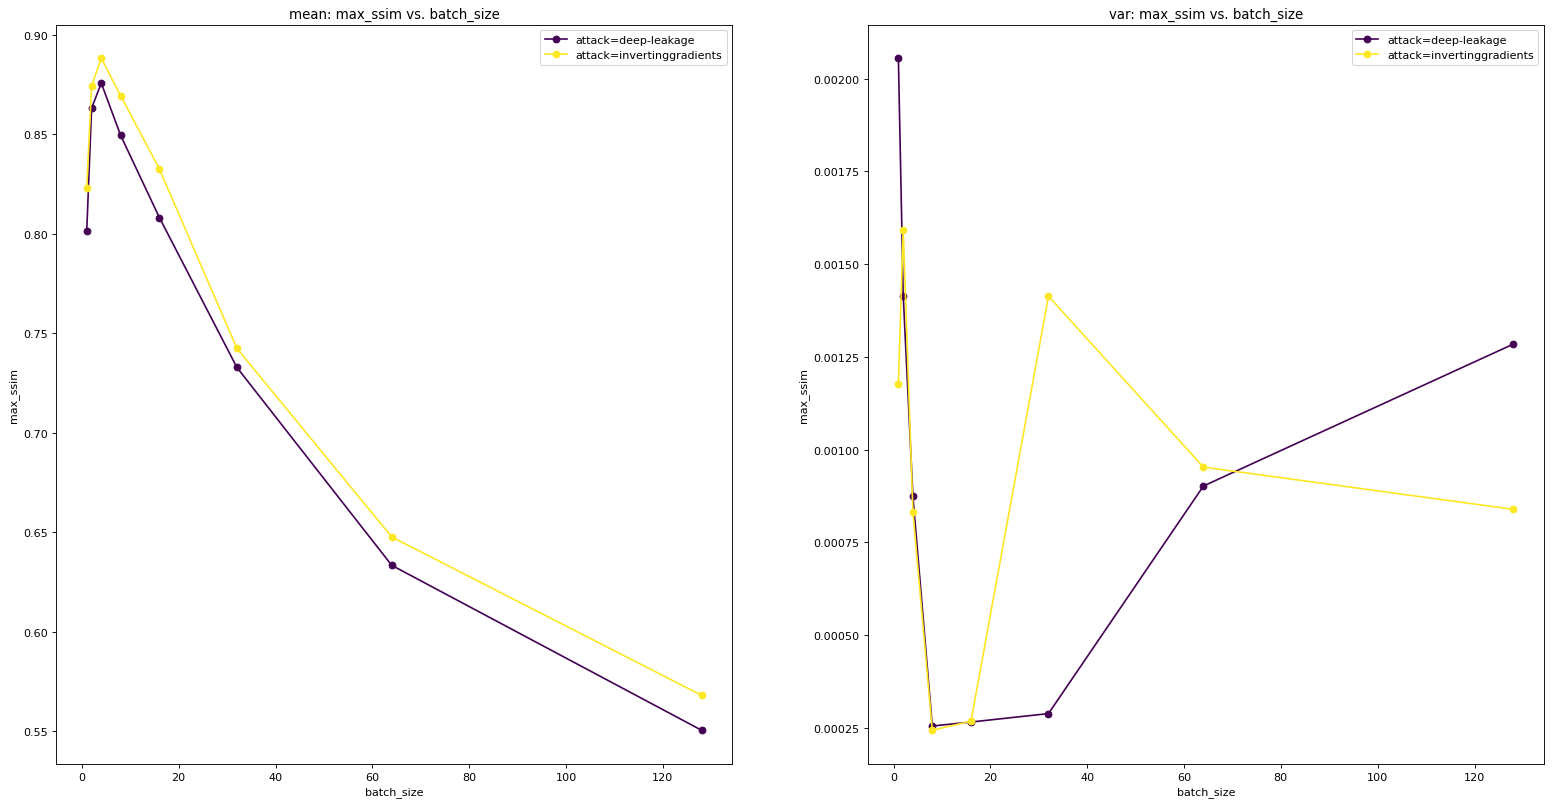

In [13]:
print(merged_df.shape)
filtered_df = merged_df.loc[merged_df["file_path"].str.contains("mask_batch_size")]
# filtered_df = filtered_df.loc[filtered_df["attack"] == "invertinggradients"]
print(filtered_df.shape)
analysis.plot_2d_df(filtered_df, x_axis="batch_size", y_axis="attack", loss_list=["ssim", "max_ssim"])

# (8,) [0.00682827 0.00443798 0.00603323 0.00580797 0.0114076  0.02408931
#  0.04849106 0.06015081]
# (8,) [3.00652204e-05 8.73452251e-06 6.66846658e-05 1.18166247e-05
#  1.89482970e-05 1.71784828e-05 1.22814940e-05 9.90334512e-06]

model: ['LeNet_Zhu']
number of total experiment: 530
mask type(1): ['mask_sparsity_quantile']
sparsity level(14): [0.95 0.99 0.9  0.2  0.01 0.5   nan 0.6  0.1  0.8  0.4  0.05 0.3  0.7 ]
number of experiment for each (mask type&sparsity level): 37.857142857142854


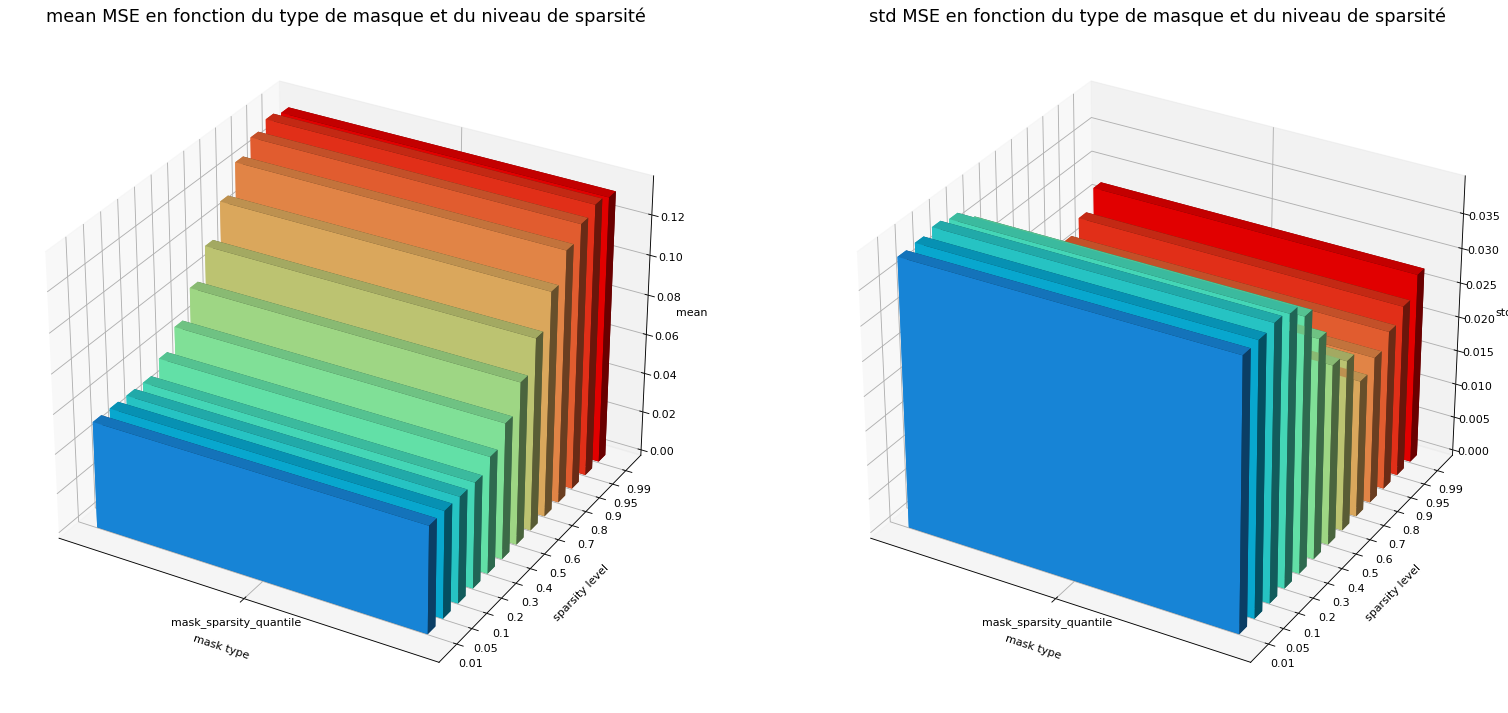

model: ['LeNet_Zhu']
number of total experiment: 530
mask type(1): ['mask_sparsity_quantile']
sparsity level(14): [0.95 0.99 0.9  0.2  0.01 0.5   nan 0.6  0.1  0.8  0.4  0.05 0.3  0.7 ]
number of experiment for each (mask type&sparsity level): 37.857142857142854


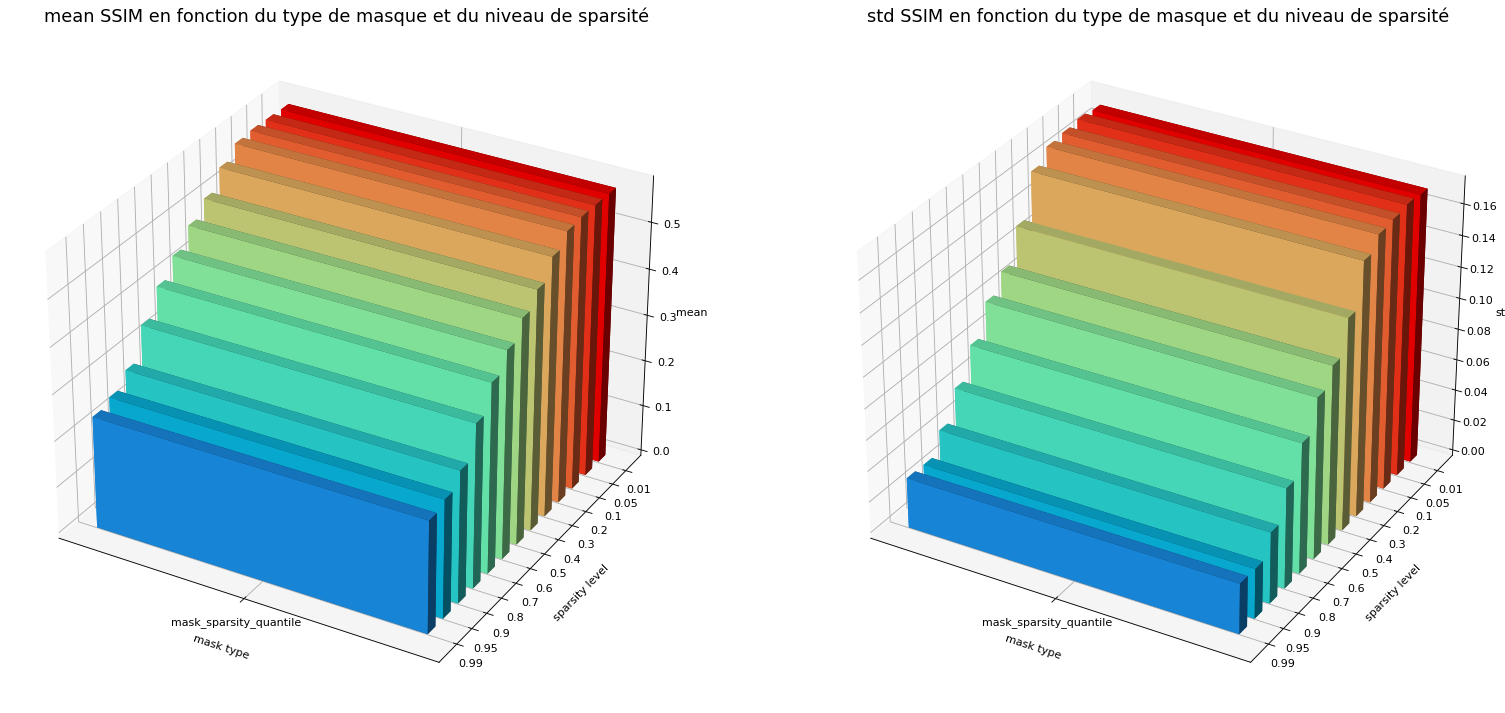

model: ['LeNet_Zhu']
number of total experiment: 530
mask type(1): ['mask_sparsity_quantile']
sparsity level(14): [0.95 0.99 0.9  0.2  0.01 0.5   nan 0.6  0.1  0.8  0.4  0.05 0.3  0.7 ]
number of experiment for each (mask type&sparsity level): 37.857142857142854


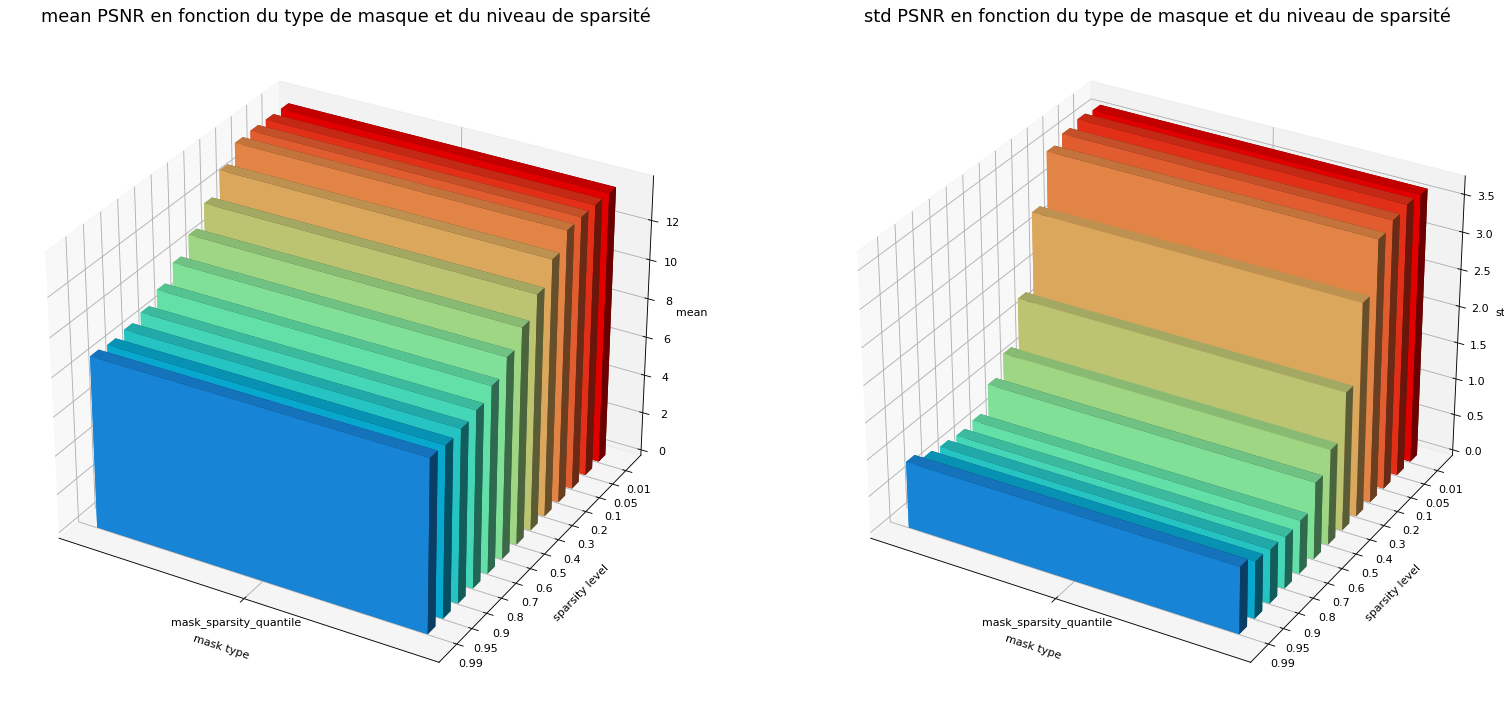

In [39]:
# Model Filtrage
model = "LeNet_Zhu"
filtered_df = merged_df.loc[merged_df["model"] == model]
# Batch filtrage
batch_size = 1
filtered_df = filtered_df.loc[filtered_df["datapoints"] == batch_size]
# Optimizer Filtrage
optimizer = "adam" # L-BFGS
filtered_df = filtered_df.loc[filtered_df["ATK_optim"].str.contains(optimizer)]
# data Filtrage/Path Filtrage
# filtered_df = filtered_df.loc[filtered_df["file_path"].str.contains("09-23-23")]
loss_list = ["mse", "ssim", "psnr"]
metric_list = ["mean", "var"]
analysis.plot_df(filtered_df, ["mse", "ssim", "psnr"], ["mean", "std"])

In [14]:
strange_exp["sparsity"] = strange_exp["ATK_objective"].str.extract(r"'sparsity': (\d+\.\d+)")
strange_exp["type"] = strange_exp["ATK_objective"].str.extract(r": {'type': '(.+?)'")
print(strange_exp["sparsity"].unique())
print(strange_exp["type"].unique())
print(len([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]) * len([0.9, 0.95, 0.99]) * len([1,2,4,8]))
print(len(strange_exp.loc[strange_exp["sparsity"] == '0.9']))
print(len(strange_exp.loc[strange_exp["sparsity"] == '0.95']))
print(len(strange_exp.loc[strange_exp["sparsity"] == '0.99']))

['0.95' '0.99' '0.9']
['mask_sparsity_quantile']
168
560
560
560


/tmp/ipykernel_7208/866695644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strange_exp["sparsity"] = strange_exp["ATK_objective"].str.extract(r"'sparsity': (\d+\.\d+)")
/tmp/ipykernel_7208/866695644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strange_exp["type"] = strange_exp["ATK_objective"].str.extract(r": {'type': '(.+?)'")


1680

1950    4
1951    4
1952    4
1953    4
1954    4
       ..
2335    4
2336    4
2337    4
2338    4
2339    4
Name: datapoints, Length: 390, dtype: int64
model: ['McMahan_32_32']
number of total experiment: 390
mask type(3): ['mask_sparsity_quantile' 'mask_sparsity_reversed_quantile'
 'mask_sparsity_random']
sparsity level(13): [0.4  0.05 0.9  0.7  0.2  0.3  0.99 0.5  0.95 0.8  0.1  0.6  0.01]
number of experiment for each (mask type&sparsity level): 10.0


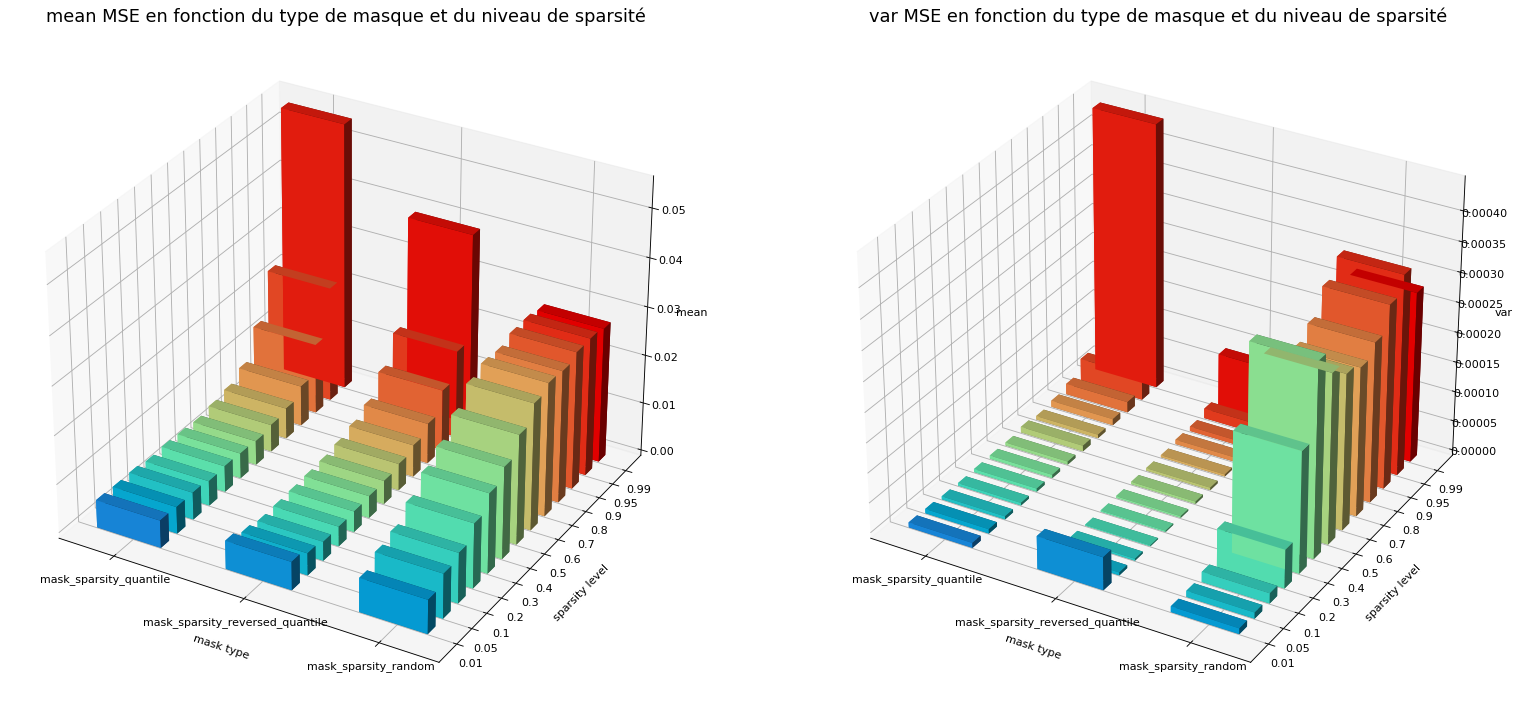

model: ['McMahan_32_32']
number of total experiment: 390
mask type(3): ['mask_sparsity_quantile' 'mask_sparsity_reversed_quantile'
 'mask_sparsity_random']
sparsity level(13): [0.4  0.05 0.9  0.7  0.2  0.3  0.99 0.5  0.95 0.8  0.1  0.6  0.01]
number of experiment for each (mask type&sparsity level): 10.0


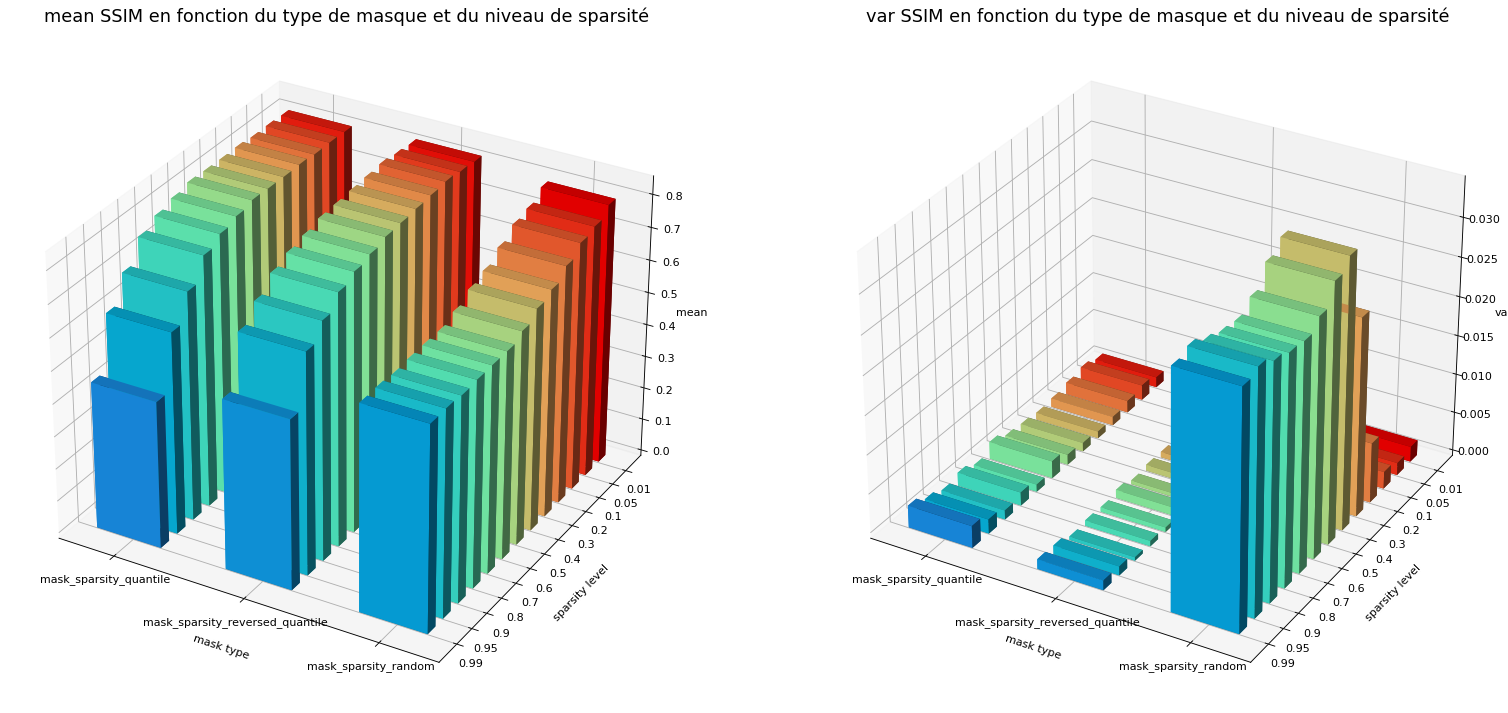

model: ['McMahan_32_32']
number of total experiment: 390
mask type(3): ['mask_sparsity_quantile' 'mask_sparsity_reversed_quantile'
 'mask_sparsity_random']
sparsity level(13): [0.4  0.05 0.9  0.7  0.2  0.3  0.99 0.5  0.95 0.8  0.1  0.6  0.01]
number of experiment for each (mask type&sparsity level): 10.0


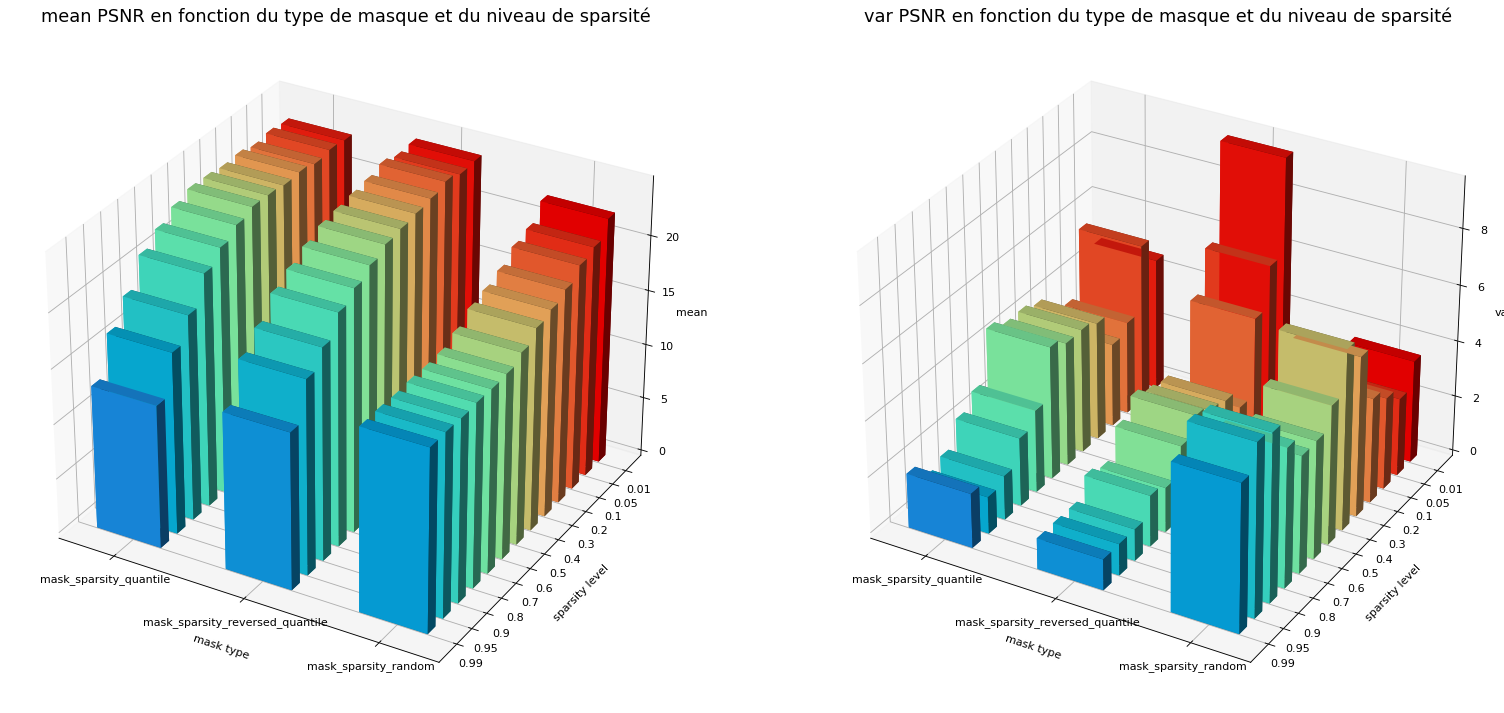

In [42]:
model = "McMahan_32_32"
filtered_df = merged_df.loc[merged_df["model"] == model]
print(filtered_df["datapoints"])
loss_list = ["mse", "ssim", "psnr"]
metric_list = ["mean", "var"]
analysis.plot_df(filtered_df, loss_list, metric_list)

model: ['VGG16']
number of total experiment: 130
number of experiment for each (mask type&sparsity level): 10.0


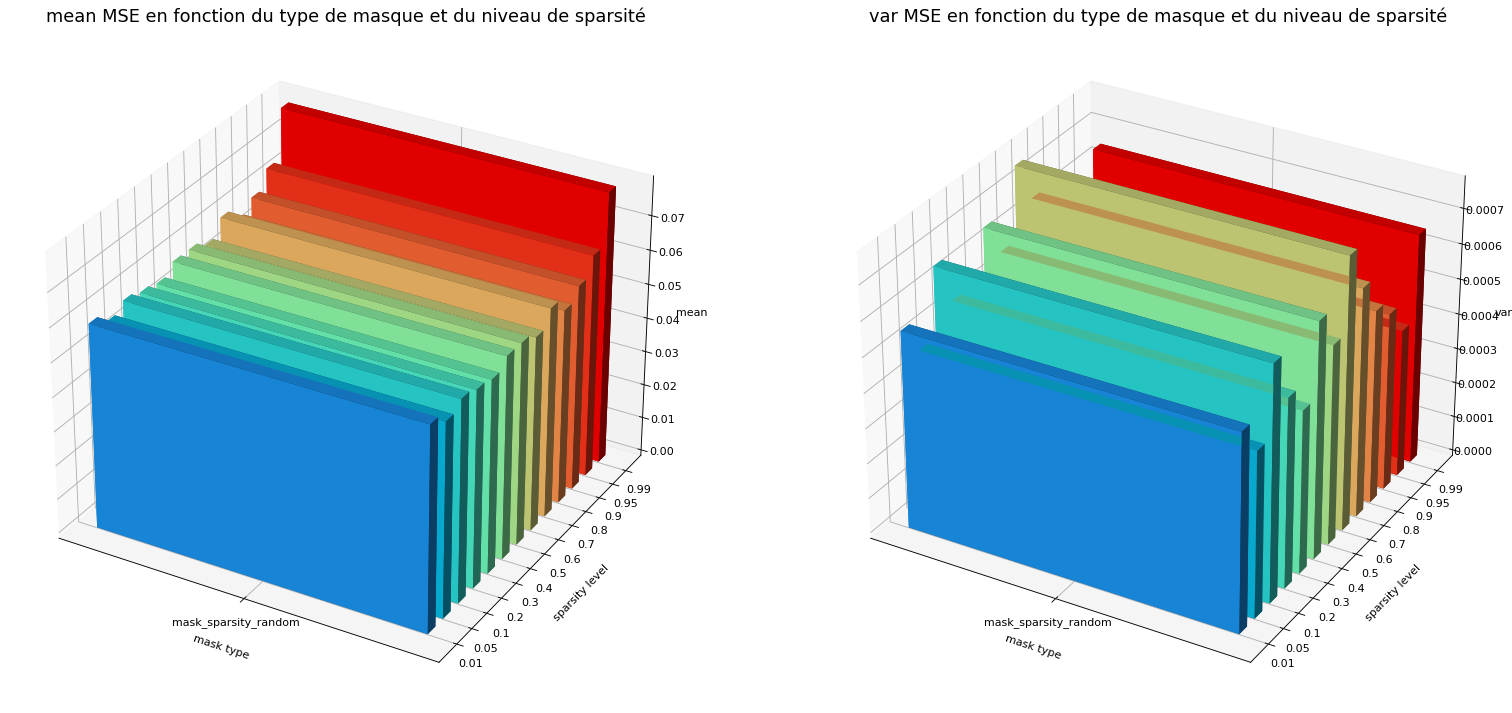

model: ['VGG16']
number of total experiment: 130
number of experiment for each (mask type&sparsity level): 10.0


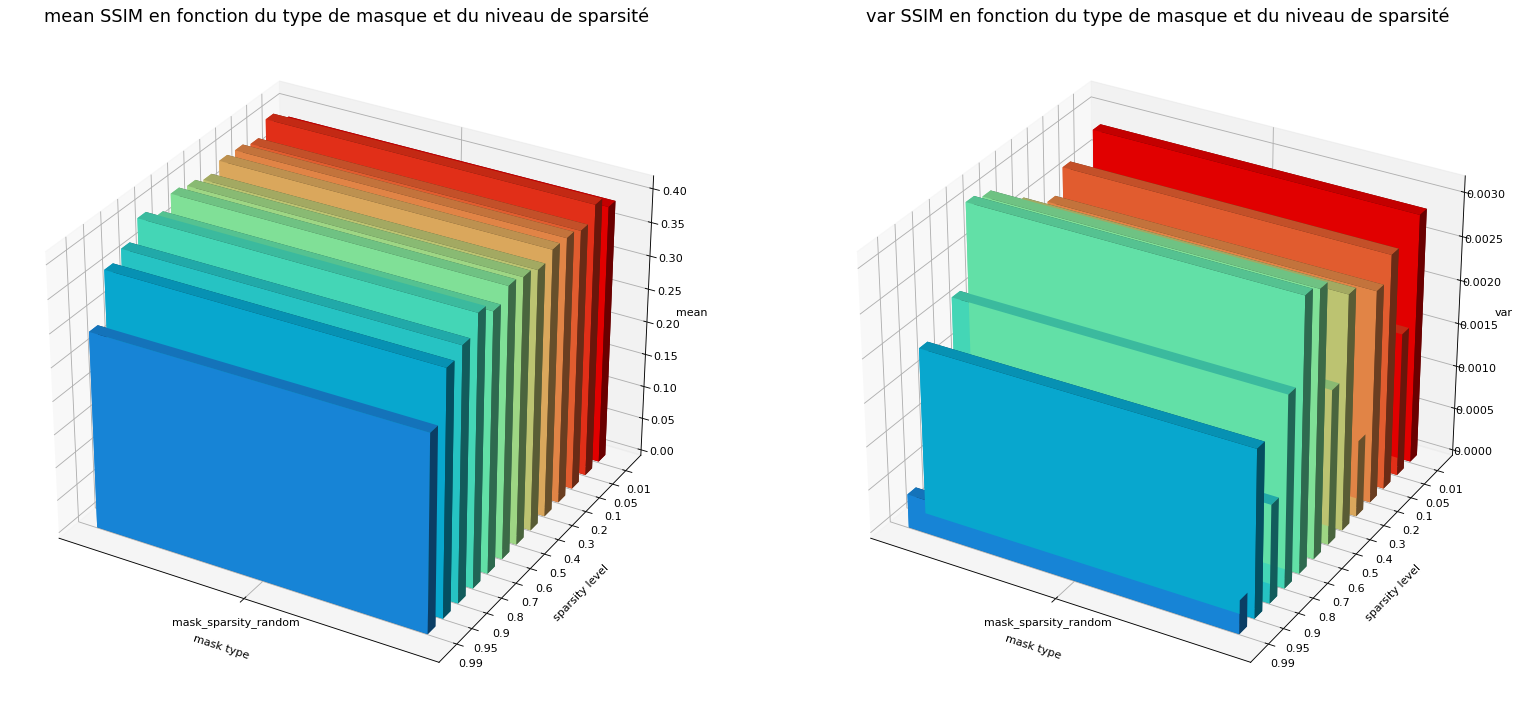

model: ['VGG16']
number of total experiment: 130
number of experiment for each (mask type&sparsity level): 10.0


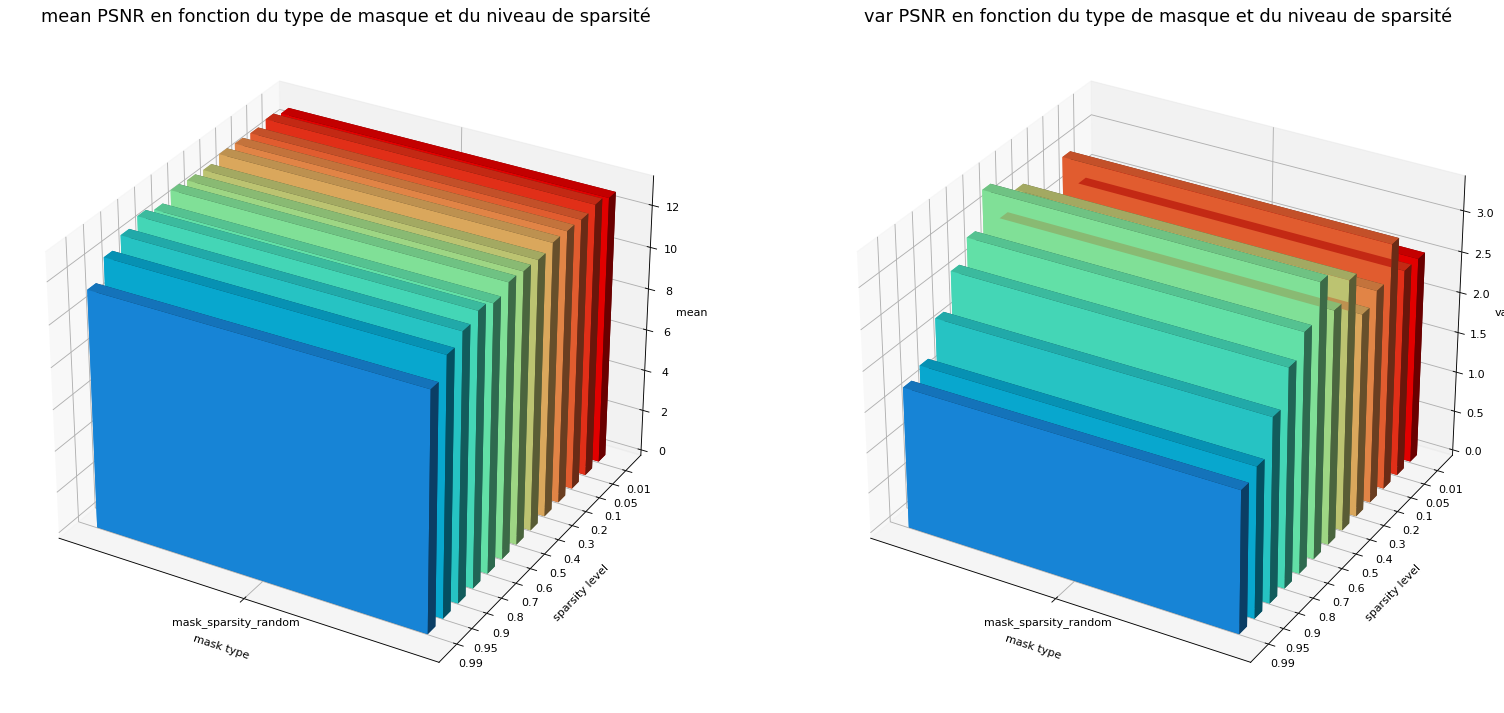

In [37]:
model = "VGG16"
filtered_df = merged_df.loc[merged_df["model"] == model]
loss_list = ["mse", "ssim", "psnr"]
metric_list = ["mean", "var"]
analysis.plot_df(filtered_df, loss_list, metric_list)

model: ['LeNet_Zhu']
number of total experiment: 140
mask type(1): ['mask_sparsity_quantile']
sparsity level(14): [0.3  0.01 0.8  0.6  0.1  0.2  0.99 0.95 0.4  0.9  0.7  0.05 0.5   nan]
number of experiment for each (mask type&sparsity level): 10.0


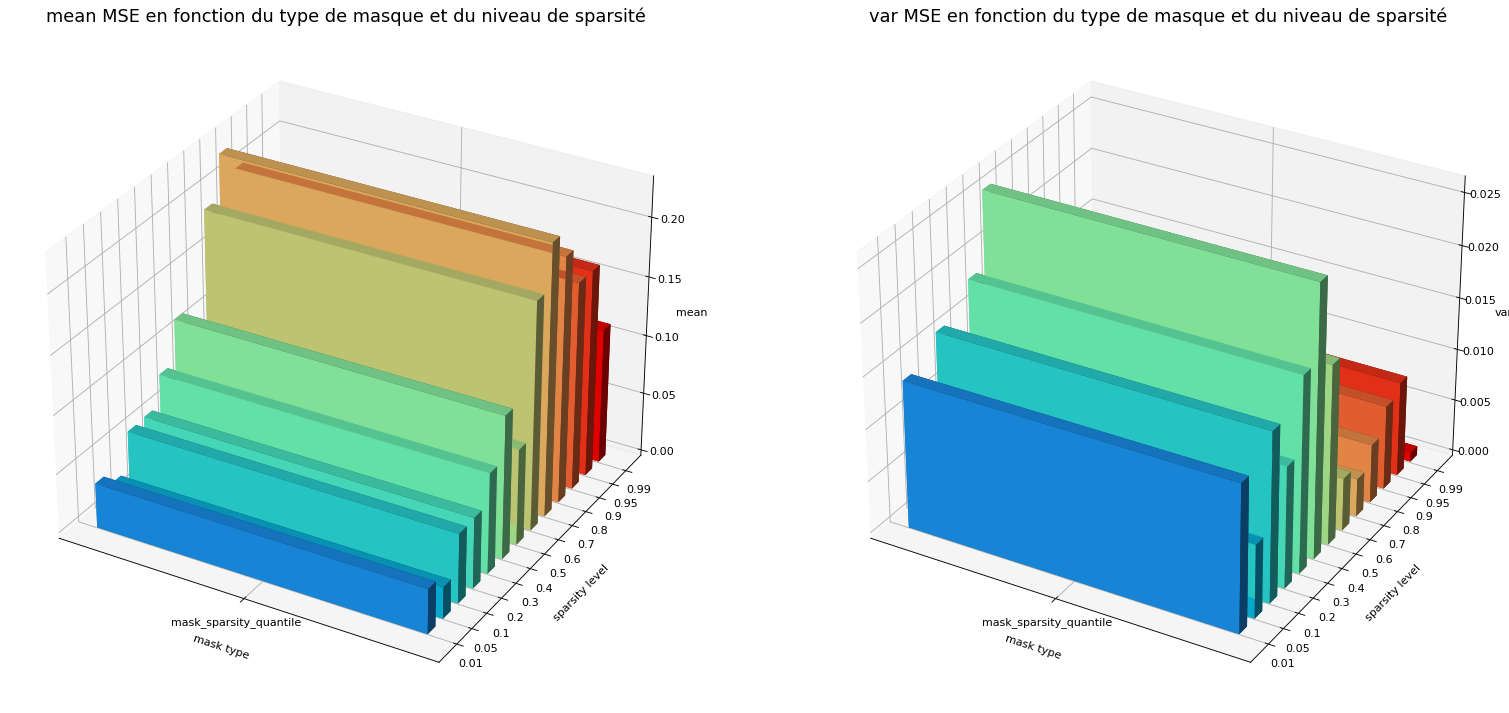

model: ['LeNet_Zhu']
number of total experiment: 140
mask type(1): ['mask_sparsity_quantile']
sparsity level(14): [0.3  0.01 0.8  0.6  0.1  0.2  0.99 0.95 0.4  0.9  0.7  0.05 0.5   nan]
number of experiment for each (mask type&sparsity level): 10.0


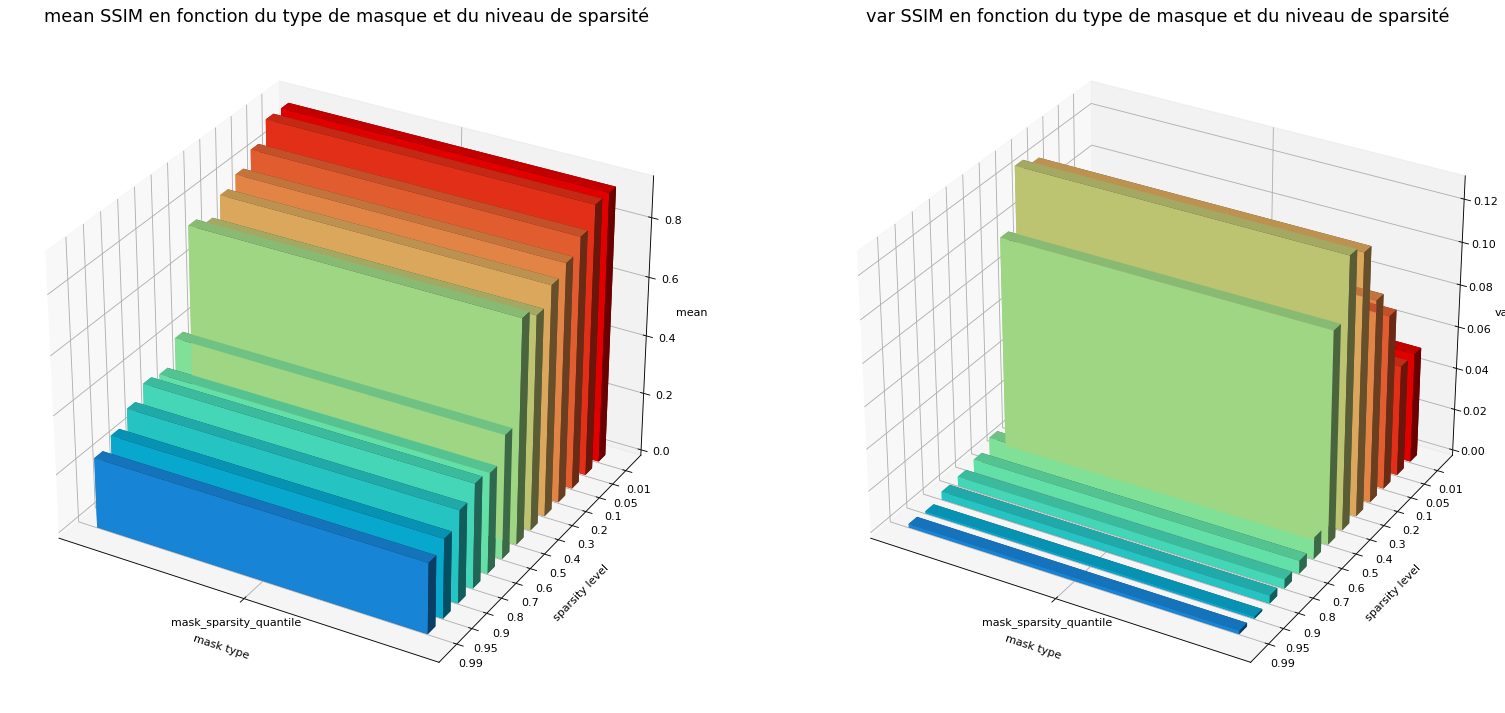

model: ['LeNet_Zhu']
number of total experiment: 140
mask type(1): ['mask_sparsity_quantile']
sparsity level(14): [0.3  0.01 0.8  0.6  0.1  0.2  0.99 0.95 0.4  0.9  0.7  0.05 0.5   nan]
number of experiment for each (mask type&sparsity level): 10.0


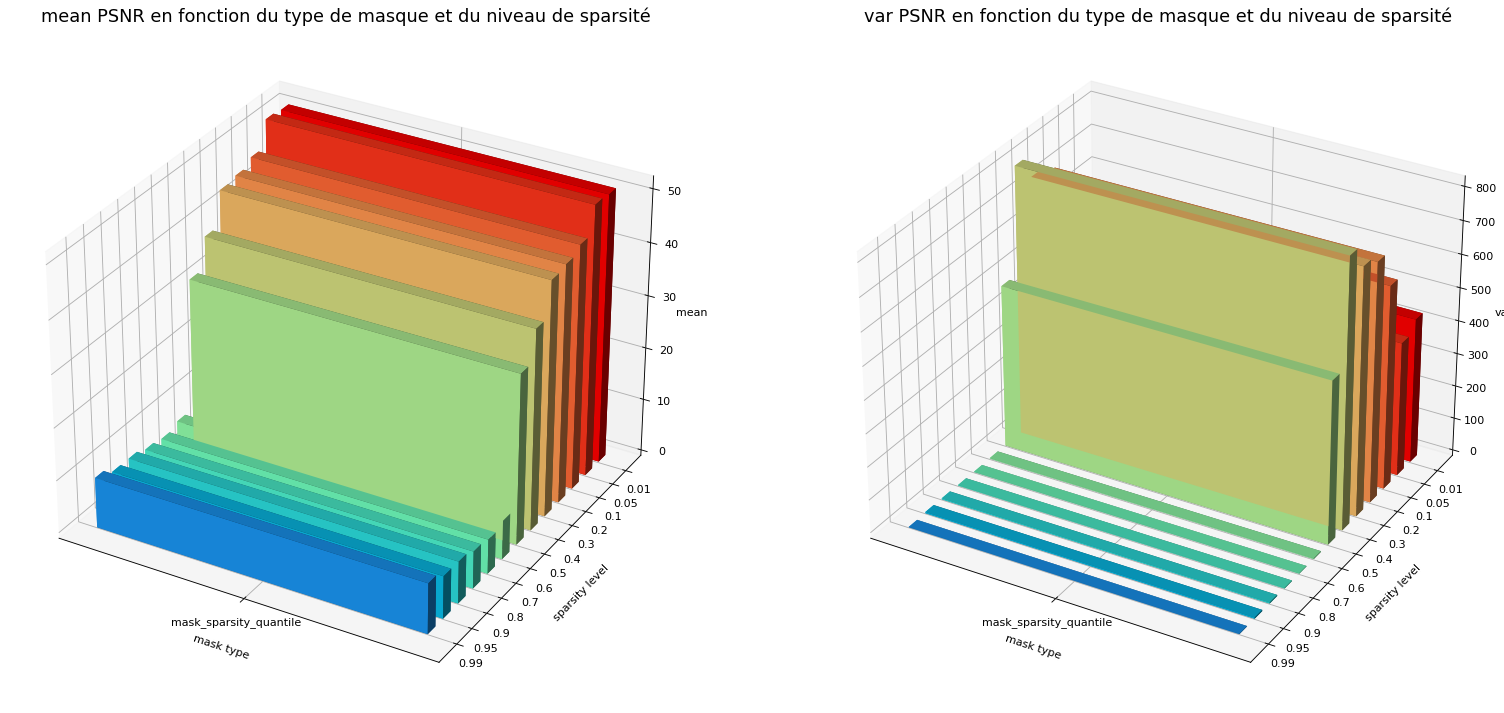

In [29]:
model = "LeNet_Zhu"
filtered_df = merged_df.loc[merged_df["model"] == model]
# filtered_df = filtered_df.loc[filtered_df["ATK_objective"].str.contains('Masked-euclidean')]
filtered_df = filtered_df.loc[filtered_df["file_path"].str.contains("reproduce_mask_compression_DLG")]
loss_list = ["mse", "ssim", "psnr"]
metric_list = ["mean", "var"]
analysis.plot_df(filtered_df, loss_list, metric_list)